In [0]:
!pip install matplotlib --upgrade
import numpy as np
import keras
from PIL import Image as im
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

import tensorflow as tf

from google.colab import files 
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#collectig data set
!pip install kaggle
#!kaggle competitions download -c airbus-ship-detection
!kaggle competitions download -c tgs-salt-identification-challenge
#ls -lha kaggle.json
#unzip
!ls
!unzip train.zip
#!unzip test.zip

In [0]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [3]:
from __future__ import print_function

import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.advanced_activations import LeakyReLU ,ELU

#from data import load_train_data, load_test_data

#K.set_image_data_format('channels_last')  # TF dimension ordering in this code


fno= 8
activation1='relu'


img_rows = 128
img_cols = 128
n_features = 1
import keras.backend as K





#def get_unet():
input_img = Input((128,128,1), name='img')
input_features = Input((n_features, ), name='feat')

conv1 = Conv2D(fno, (3, 3), activation= activation1, padding='same')(input_img)
conv1 = Conv2D(fno, (3, 3), activation= activation1, padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(fno*2, (3, 3), activation= activation1, padding='same')(pool1)
conv2 = Conv2D(fno*2, (3, 3), activation= activation1, padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(fno*4, (3, 3), activation= activation1, padding='same')(pool2)
conv3 = Conv2D(fno*4, (3, 3), activation= activation1, padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(fno*8, (3, 3), activation= activation1, padding='same')(pool3)
conv4 = Conv2D(fno*8, (3, 3), activation= activation1, padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

# Join features information in the depthest layer
f_repeat = RepeatVector(8*8)(input_features)
f_conv = Reshape((8, 8, n_features))(f_repeat)
p4_feat = concatenate([pool4, f_conv], -1)

conv5 = Conv2D(fno*16, (3, 3), activation= activation1, padding='same')(p4_feat)
conv5 = Conv2D(fno*16, (3, 3), activation= activation1, padding='same')(conv5)

up6 = concatenate([Conv2DTranspose(fno*8, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(fno*8, (3, 3), activation= activation1, padding='same')(up6)
conv6 = Conv2D(fno*8, (3, 3), activation= activation1, padding='same')(conv6)

up7 = concatenate([Conv2DTranspose(fno*4, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(fno*4, (3, 3), activation= activation1, padding='same')(up7)
conv7 = Conv2D(fno*4, (3, 3), activation= activation1, padding='same')(conv7)

up8 = concatenate([Conv2DTranspose(fno*2, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(fno*2, (3, 3), activation= activation1, padding='same')(up8)
conv8 = Conv2D(fno*2, (3, 3), activation= activation1, padding='same')(conv8)

up9 = concatenate([Conv2DTranspose(fno, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(fno, (3, 3), activation= activation1, padding='same')(up9)
conv9 = Conv2D(fno, (3, 3), activation= activation1, padding='same')(conv9)

conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

model = Model(inputs=[input_img,input_features], outputs=[conv10])
   
    #model = get_unet()
#metrics=[mean_iou]

# model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])

#return model




model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=[mean_iou]) 
#, metrics=[mean_iou]) # The mean_iou metrics seens to leak train and test values...
model.summary()
#Adam(lr=1e-5)



                                                                       

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  80          img[0][0]                        
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 8)  584         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 8)    0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [4]:

!ls


depths.csv  kaggle.json  sample_data		test.zip   train.zip
images	    masks	 sample_submission.csv	train.csv


In [5]:
import sys
sys.stdout.flush()

!mkdir ./test
!cp test.zip ./test
!ls ./test
!unzip ./test/test.zip  -d ./test
sizes_test= []
test_ids=next(os.walk("./test/images/"))[2]
train_ids=next(os.walk("./images/"))[2]
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
t = np.zeros((len(test_ids), 128, 128, 1), dtype=np.float32)
x = np.zeros((len(train_ids), 128, 128, 1), dtype=np.float32)
y = np.zeros((len(train_ids), 128, 128, 1), dtype=np.float32)
X_feat = np.zeros((len(train_ids), n_features), dtype=np.float32)
t_feat = np.zeros((len(test_ids), n_features), dtype=np.float32)
import pandas as pd
depth = pd.read_csv('./depths.csv',index_col="id")
for n, id_ in enumerate(train_ids):
    img = load_img( './images/' + id_, grayscale=True )
    x_img = img_to_array(img)
    x_img = resize(x_img, (128, 128, 1), mode='constant', preserve_range=True)
    x[n, ..., 0]=x_img.squeeze()/255
    X_feat[n] = depth.loc[id_.replace('.png', ''), 'z']

    mask = load_img( './masks/' + id_, grayscale=True )
    y_img = img_to_array(mask)
    y_img = resize(y_img, (128, 128, 1), mode='constant', preserve_range=True)
    y[n]=y_img/255
for n, id_ in enumerate(test_ids):
    test = load_img( './test/images/' + id_, grayscale=True )
    t_img = img_to_array(test)
    sizes_test.append([t_img.shape[0], t_img.shape[1]])

    t_img = resize(t_img, (128, 128, 1), mode='constant', preserve_range=True)
    t[n, ..., 0]=t_img.squeeze()/255
    t_feat[n] = depth.loc[id_.replace('.png', ''), 'z']


    print(n)

test.zip
Archive:  ./test/test.zip
   creating: ./test/images/
  inflating: ./test/images/8cf16aa0f5.png  
  inflating: ./test/images/23012be6b7.png  
  inflating: ./test/images/9e46a3352e.png  
  inflating: ./test/images/8016056c46.png  
  inflating: ./test/images/a490a68472.png  
  inflating: ./test/images/cf19041b8e.png  
  inflating: ./test/images/a5c02f60cd.png  
  inflating: ./test/images/631cec82b9.png  
  inflating: ./test/images/bffa15aaa5.png  
  inflating: ./test/images/31e17c9459.png  
  inflating: ./test/images/b695427db8.png  
  inflating: ./test/images/57b062d234.png  
  inflating: ./test/images/1705ade299.png  
  inflating: ./test/images/f1a3d6352e.png  
  inflating: ./test/images/99e331e803.png  
  inflating: ./test/images/d343f6974e.png  
  inflating: ./test/images/068f7a5267.png  
  inflating: ./test/images/d4c235a41e.png  
  inflating: ./test/images/bf56f7dd40.png  
  inflating: ./test/images/6b8b1e7ad6.png  
  inflating: ./test/images/c268afb4a1.png  
  inflating: 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
#!ls test
#y.shape
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
X_train, X_valid, X_feat_train, X_feat_valid, y_train, y_valid = train_test_split(x, X_feat, y, test_size=0.15, random_state=42)

In [13]:

callbacks = [
     EarlyStopping(patience=15, verbose=1),
 #   ReduceLROnPlateau(patience=3, verbose=1),
    ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

results = model.fit({'img': X_train, 'feat': X_feat_train}, y_train, batch_size=16, epochs=500, callbacks=callbacks,
                    validation_data=({'img': X_valid, 'feat': X_feat_valid}, y_valid))

Train on 3400 samples, validate on 600 samples
Epoch 1/500
3400/3400 [==============================] - 19s 5ms/step - loss: 0.2266 - mean_iou: 0.6017 - val_loss: 0.4607 - val_mean_iou: 0.6032

Epoch 00001: val_loss improved from inf to 0.46070, saving model to model-tgs-salt-1.h5
Epoch 2/500
3400/3400 [==============================] - 19s 5ms/step - loss: 0.2284 - mean_iou: 0.6043 - val_loss: 0.1911 - val_mean_iou: 0.6063

Epoch 00002: val_loss improved from 0.46070 to 0.19105, saving model to model-tgs-salt-1.h5
Epoch 3/500
3400/3400 [==============================] - 18s 5ms/step - loss: 0.1916 - mean_iou: 0.6082 - val_loss: 0.2124 - val_mean_iou: 0.6102

Epoch 00003: val_loss did not improve from 0.19105
Epoch 4/500
3400/3400 [==============================] - 19s 5ms/step - loss: 0.1824 - mean_iou: 0.6121 - val_loss: 0.1926 - val_mean_iou: 0.6142

Epoch 00004: val_loss did not improve from 0.19105
Epoch 5/500
3400/3400 [==============================] - 19s 5ms/step - loss: 0.181

In [17]:
model.load_weights('model-tgs-salt-1.h5')

model.evaluate({'img': X_valid, 'feat': X_feat_valid}, y_valid, verbose=1)


600/600 [==============================] - 1s 2ms/step


[0.16673728475968044, 0.7040612697601318]

In [16]:
model.load_weights('model-tgs-salt-1.h5')

model.evaluate({'img': x, 'feat': X_feat}, y, verbose=1)

ValueError: ignored

In [10]:
x


#model = load_model('model-tgs-salt-1.h5', custom_objects={'mean_iou': mean_iou})
#preds_train = model.predict(x[:int(x.shape[0]*0.9)], verbose=1)
#preds_val = model.predict(x[int(x.shape[0]*0.9):], verbose=1)
#a = t[2]
#a.squeeze
#a.shape
preds_train = model.predict({'img': x, 'feat': X_feat}, verbose=1)

preds_test = model.predict({'img': t, 'feat': t_feat}, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
#preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

preds_test_upsampled = []
for i in range(18000):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), (sizes_test[i][0], sizes_test[i][1]), mode='constant', preserve_range=True))

18000/18000 [==============================] - 17s 940us/step


In [11]:
preds_valid = model.predict({'img': X_valid, 'feat': X_feat_valid}, verbose=1)
preds_valid_t = (preds_valid > 0.5).astype(np.uint8)



600/600 [==============================] - 1s 1ms/step


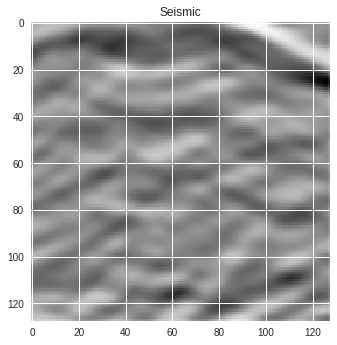

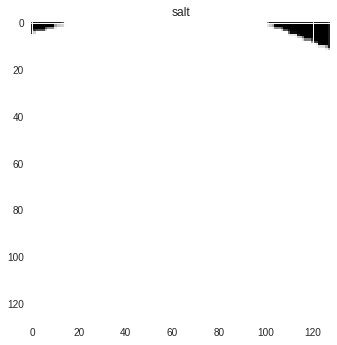

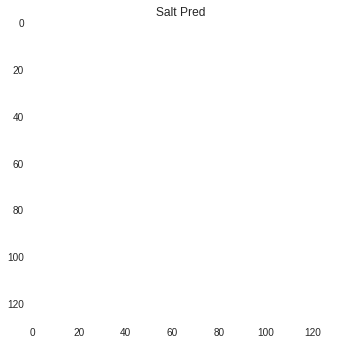

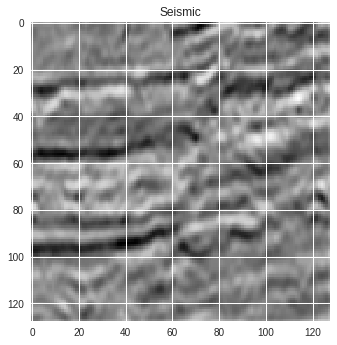

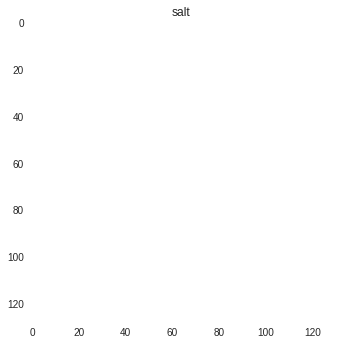

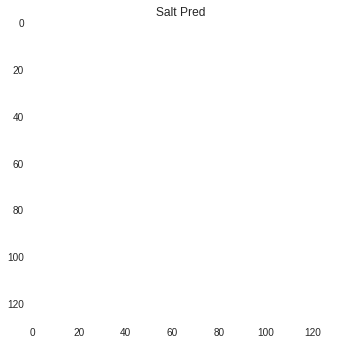

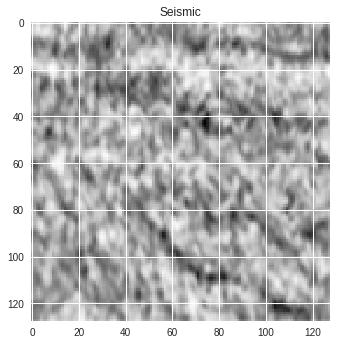

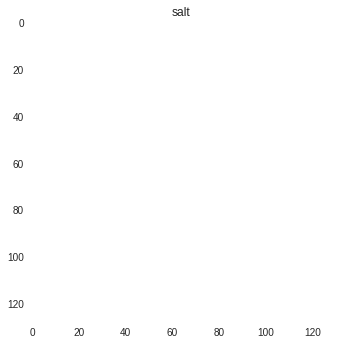

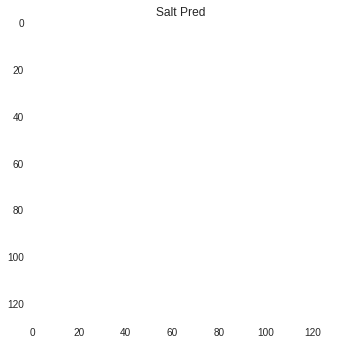

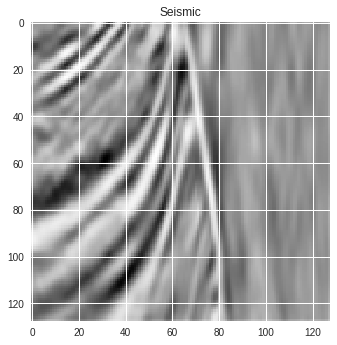

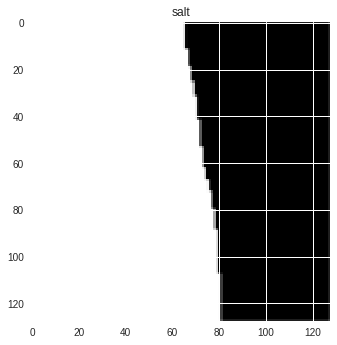

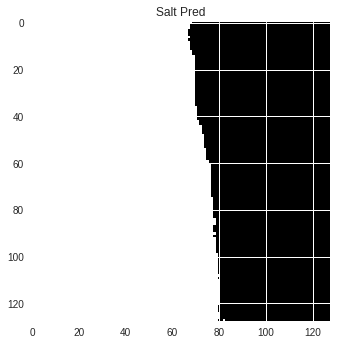

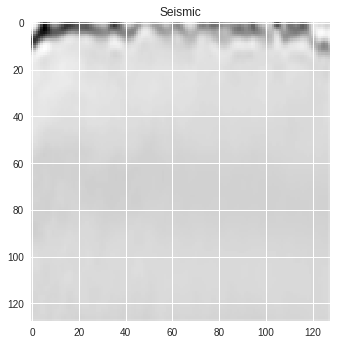

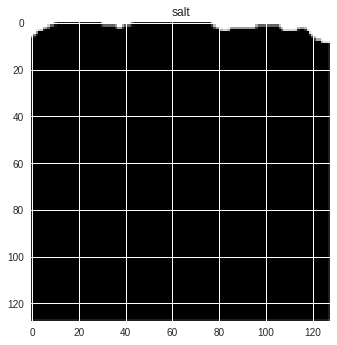

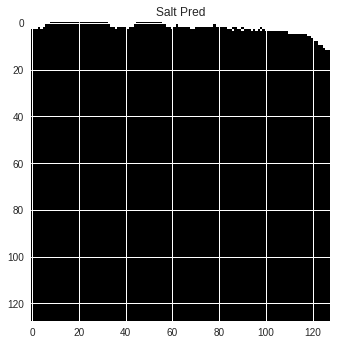

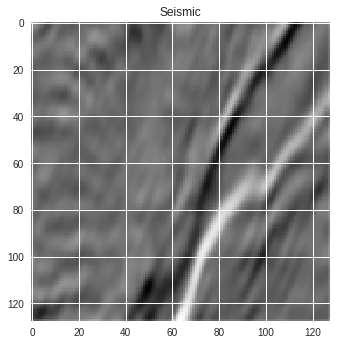

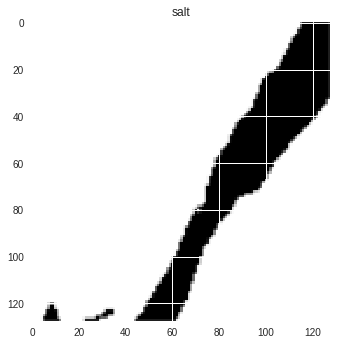

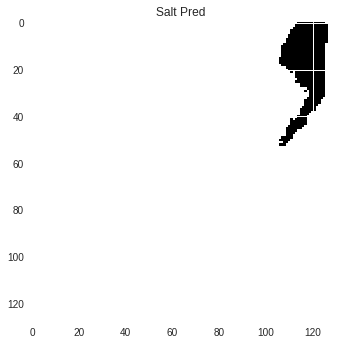

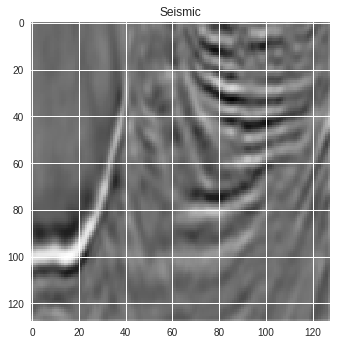

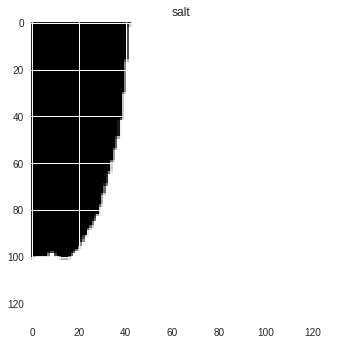

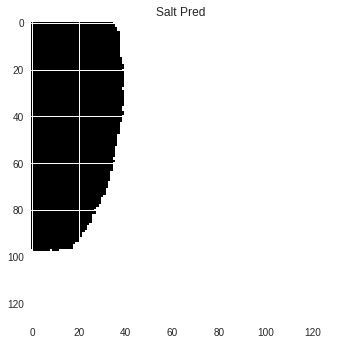

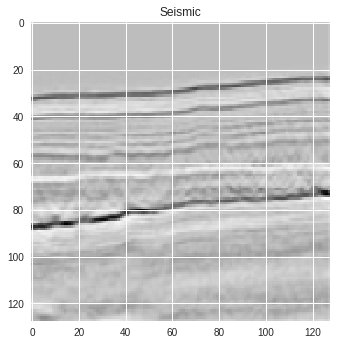

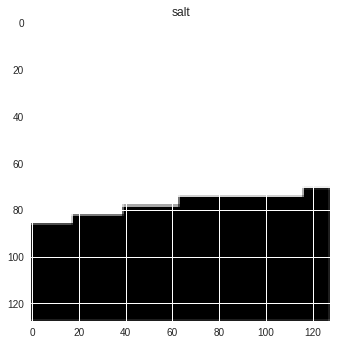

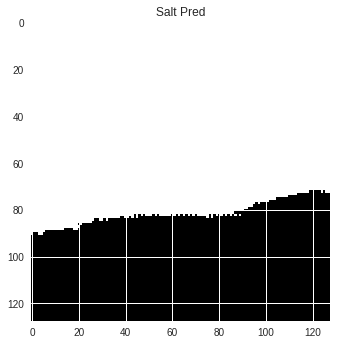

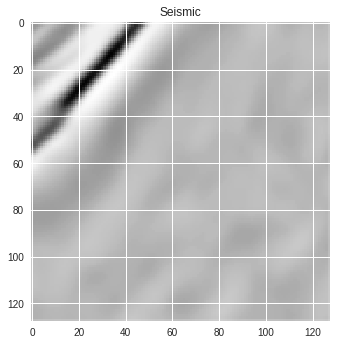

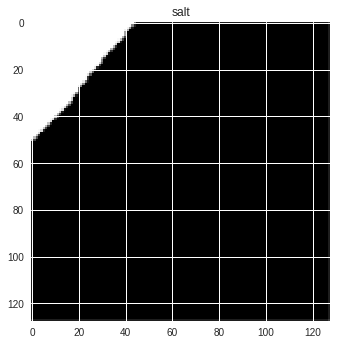

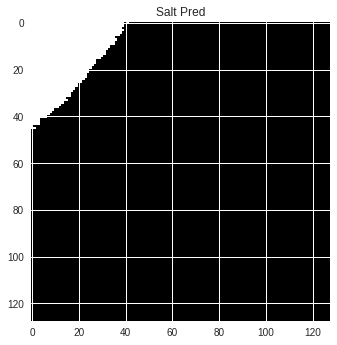

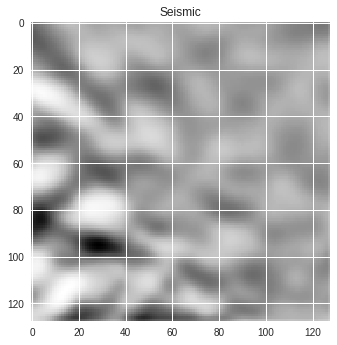

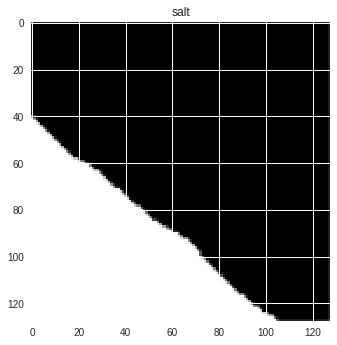

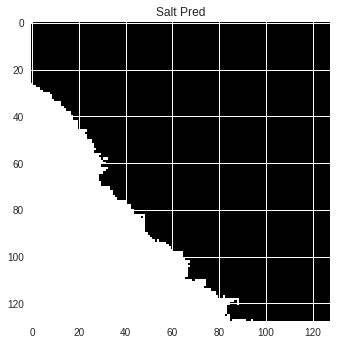

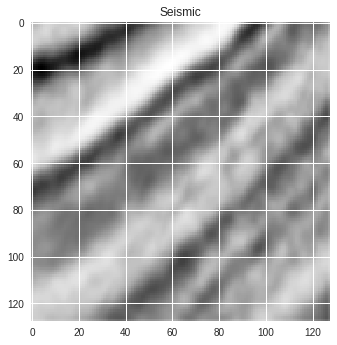

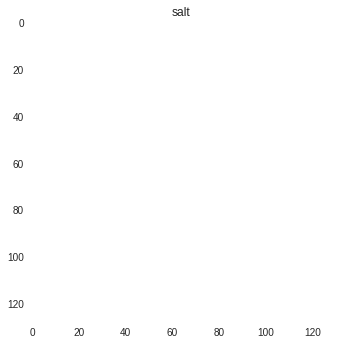

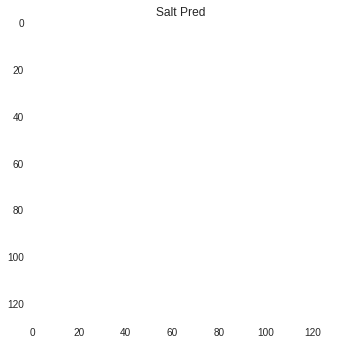

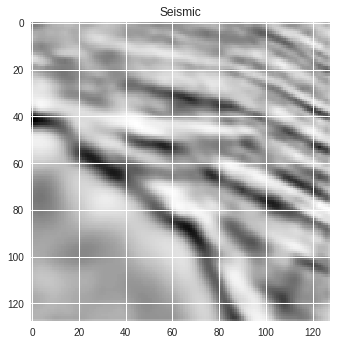

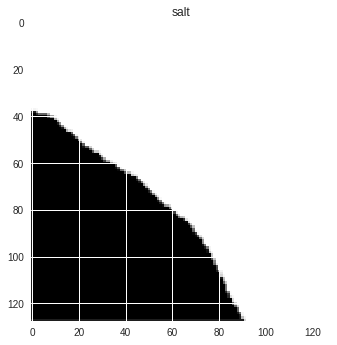

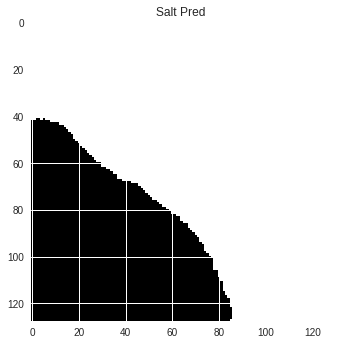

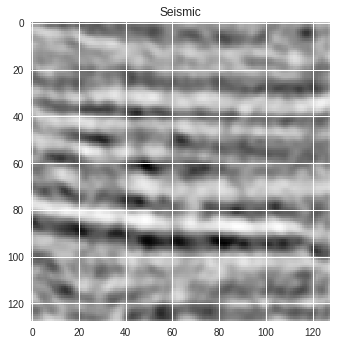

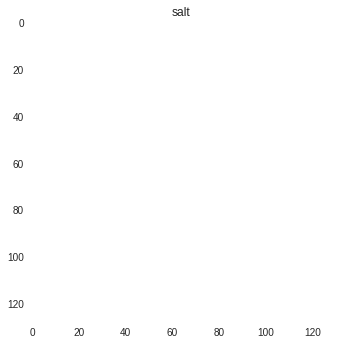

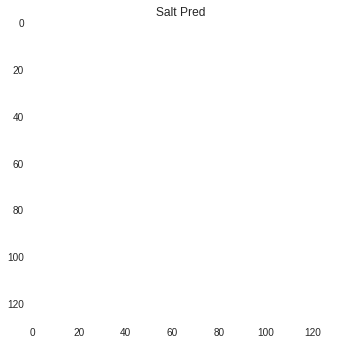

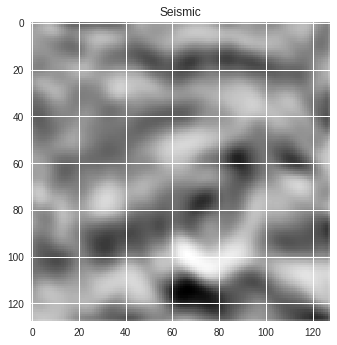

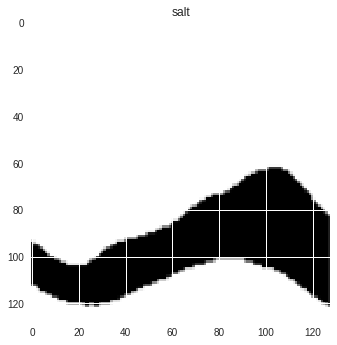

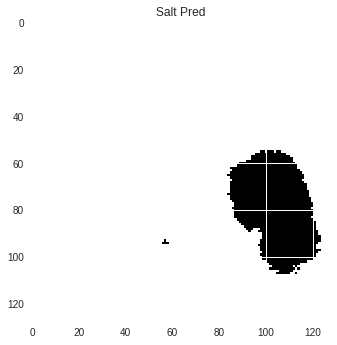

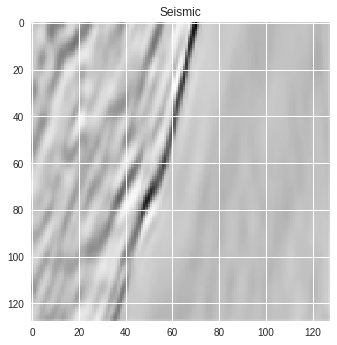

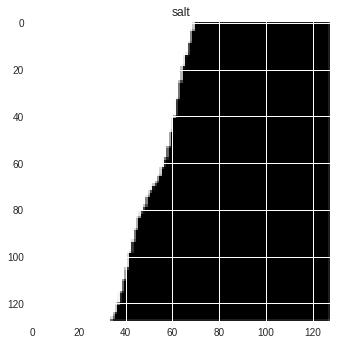

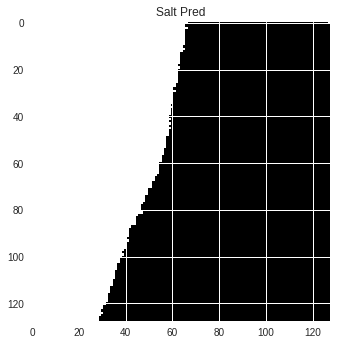

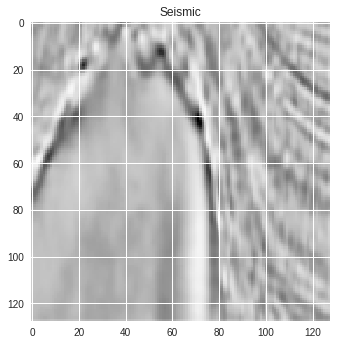

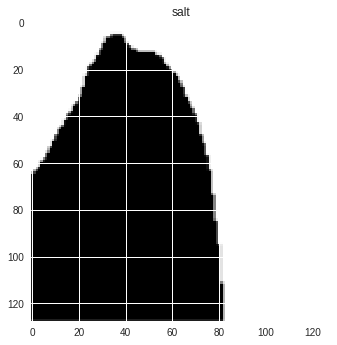

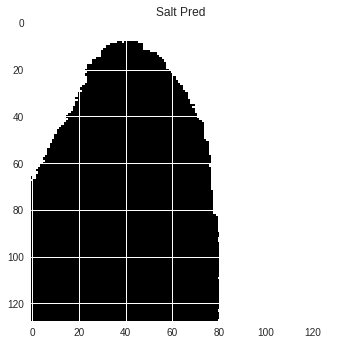

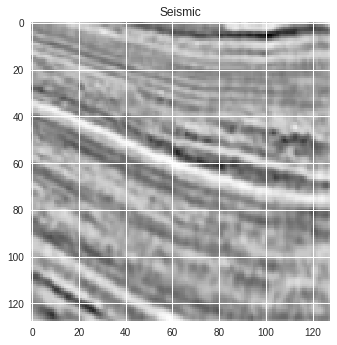

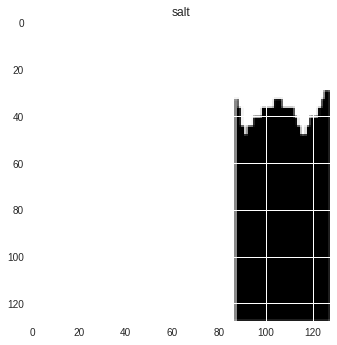

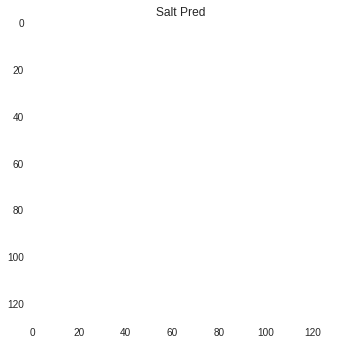

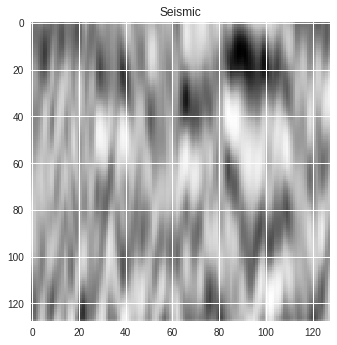

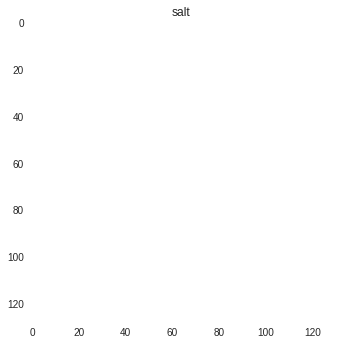

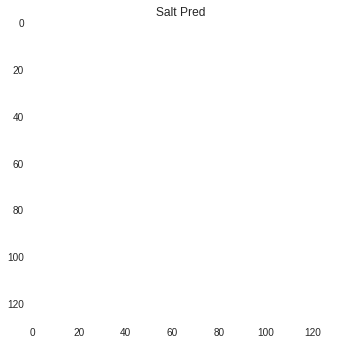

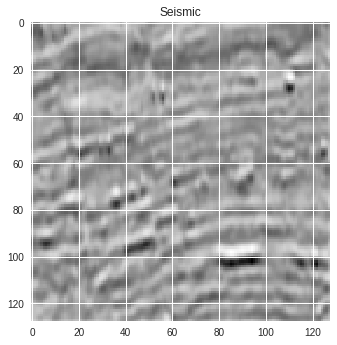

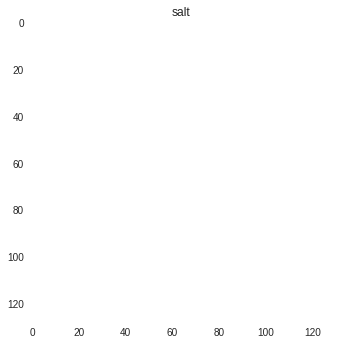

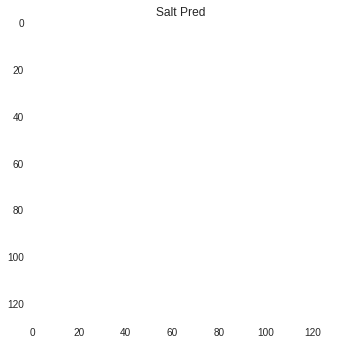

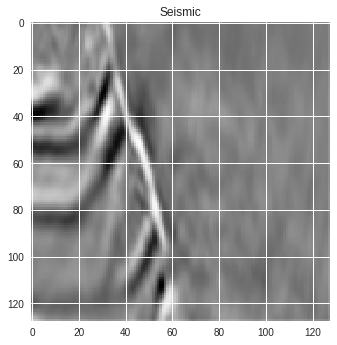

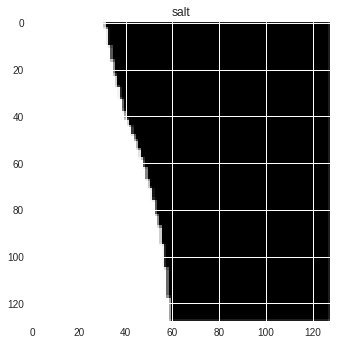

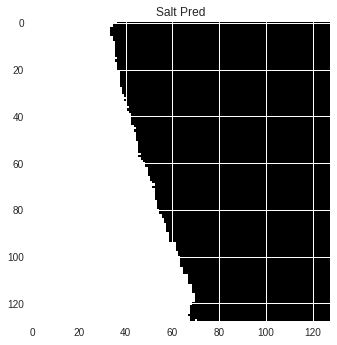

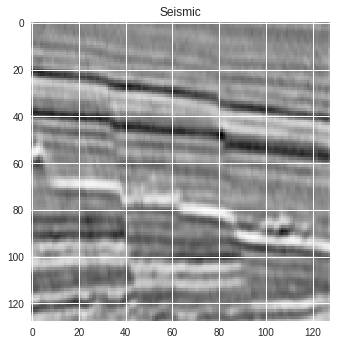

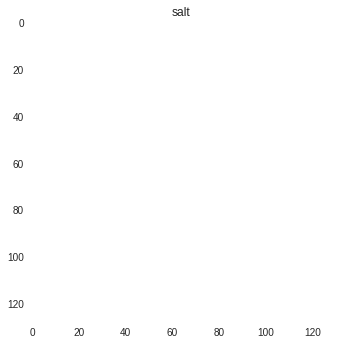

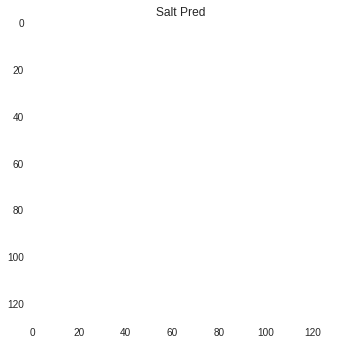

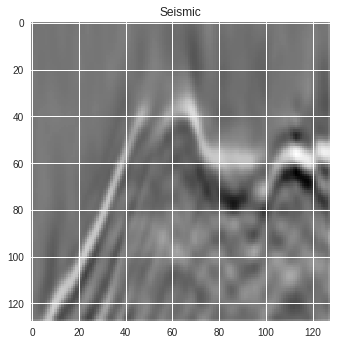

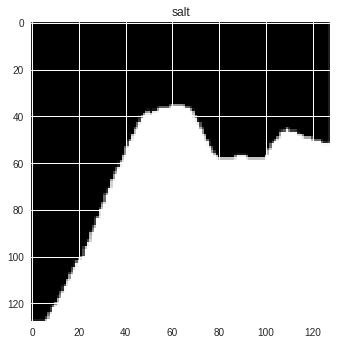

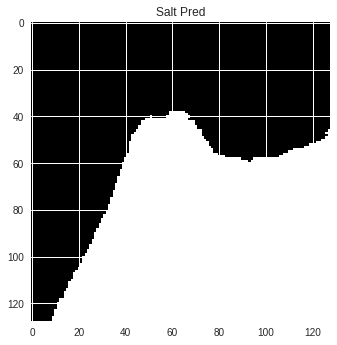

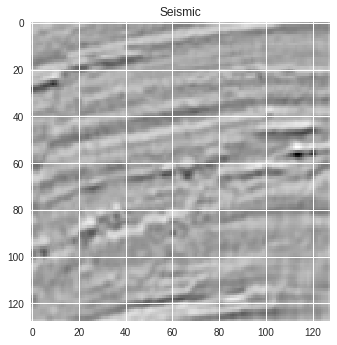

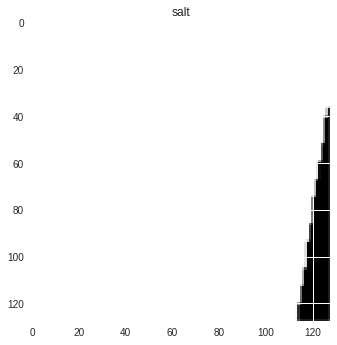

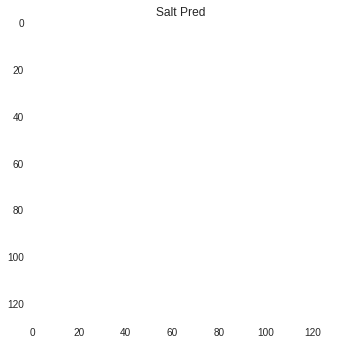

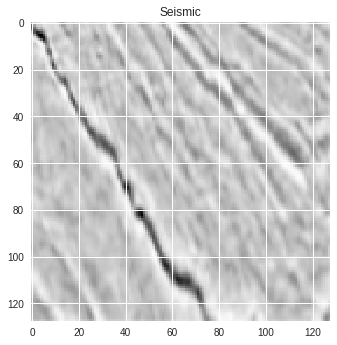

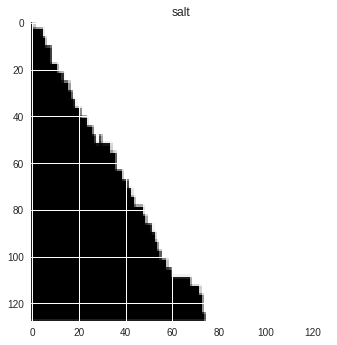

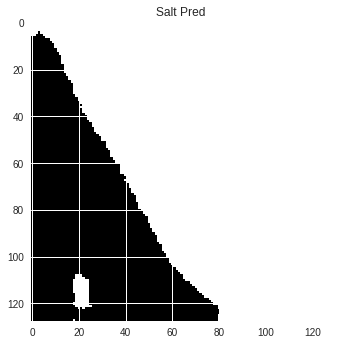

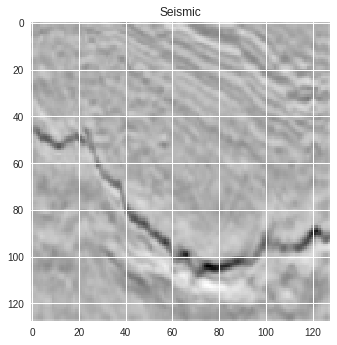

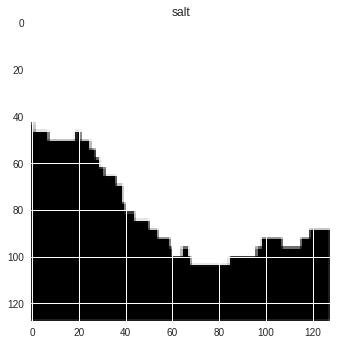

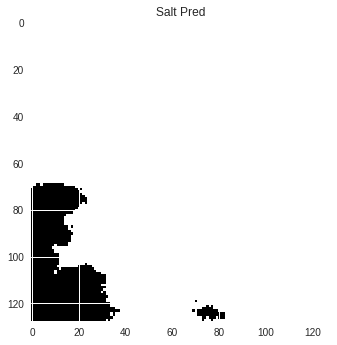

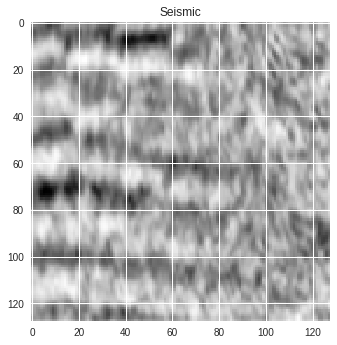

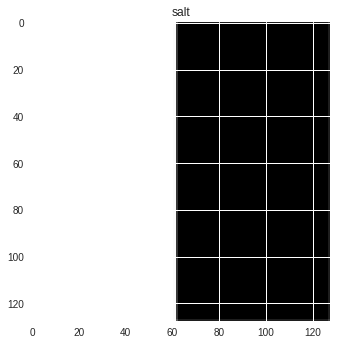

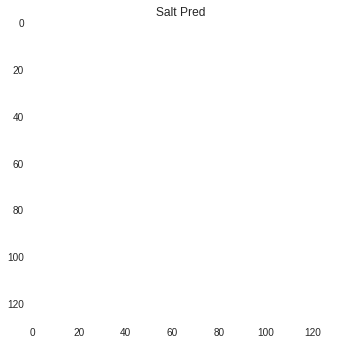

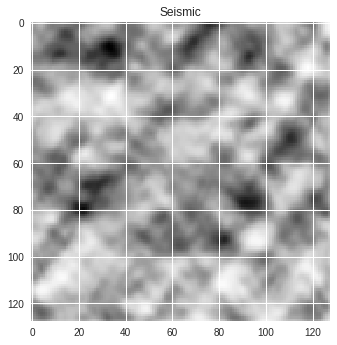

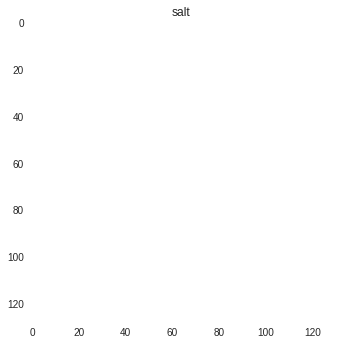

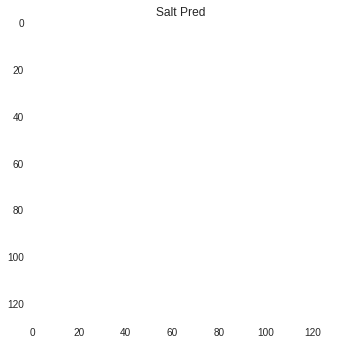

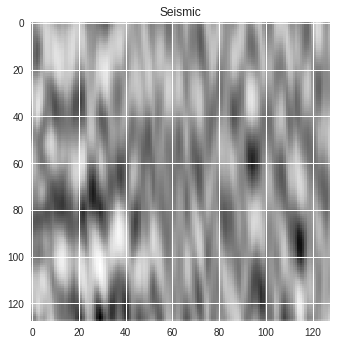

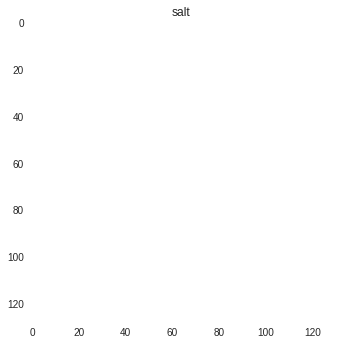

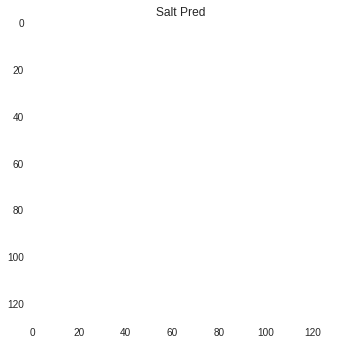

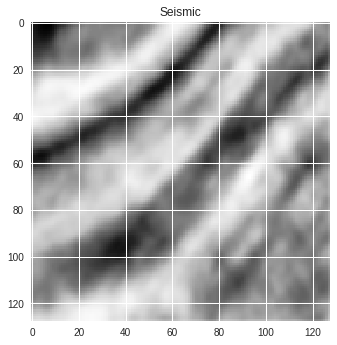

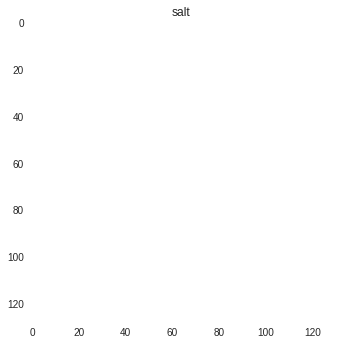

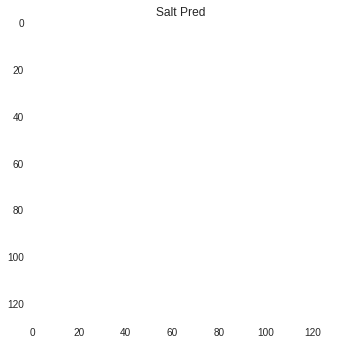

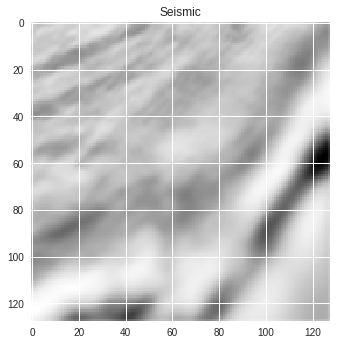

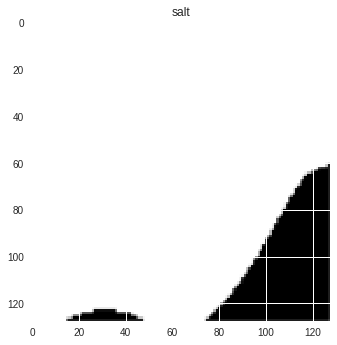

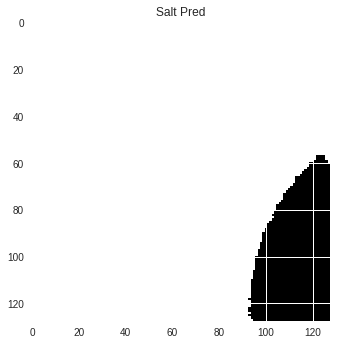

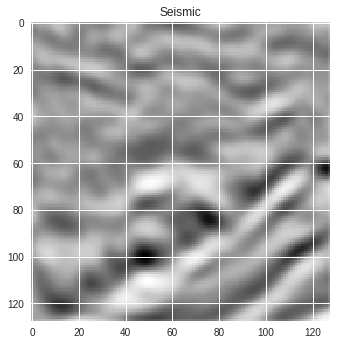

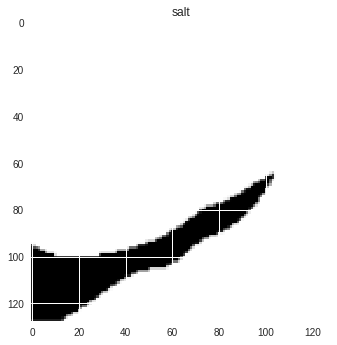

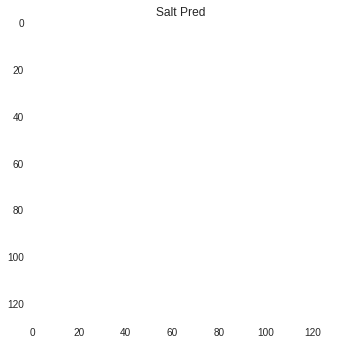

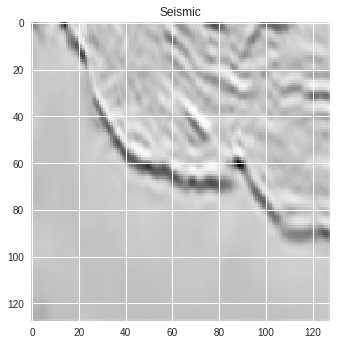

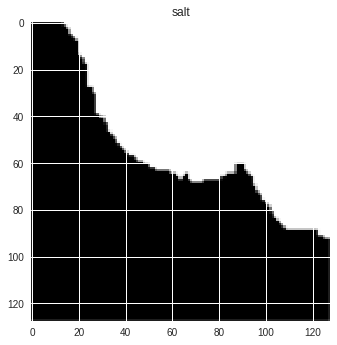

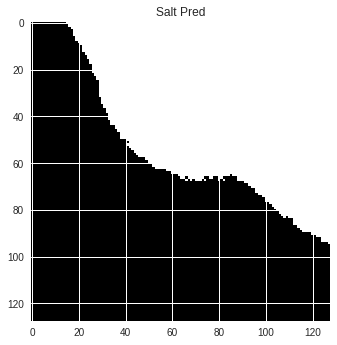

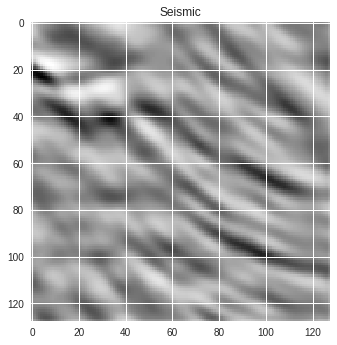

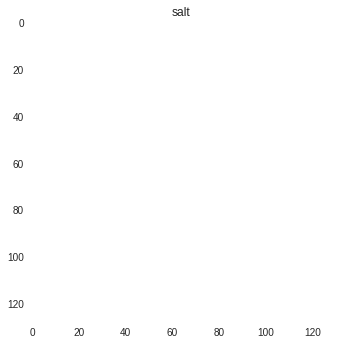

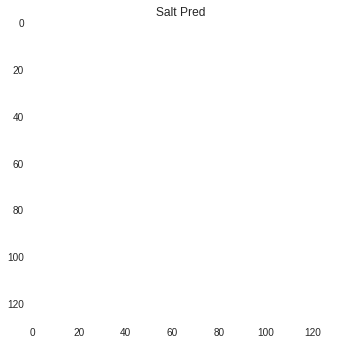

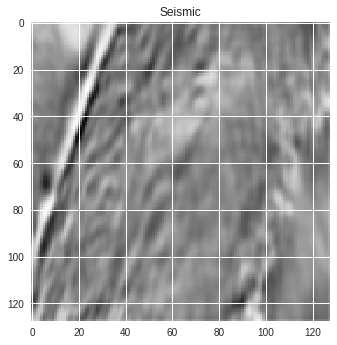

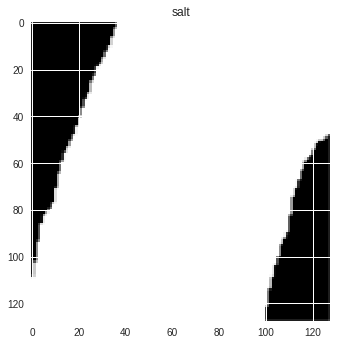

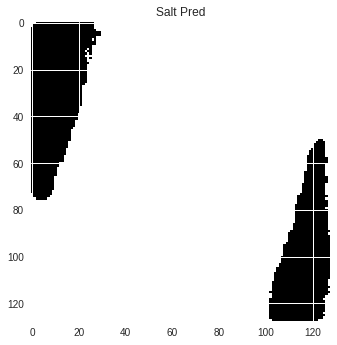

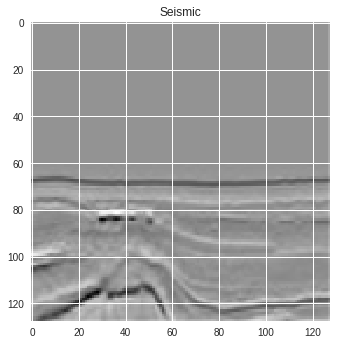

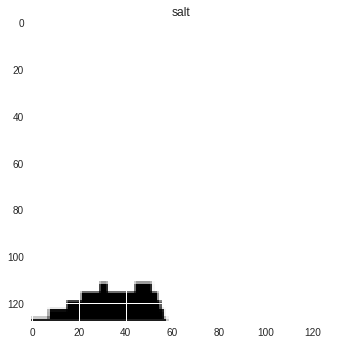

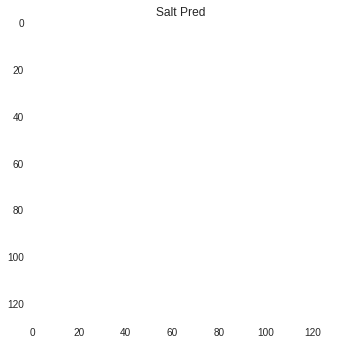

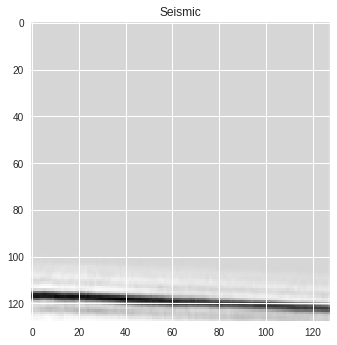

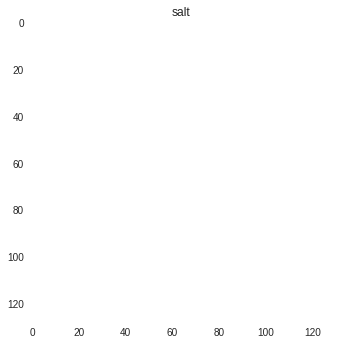

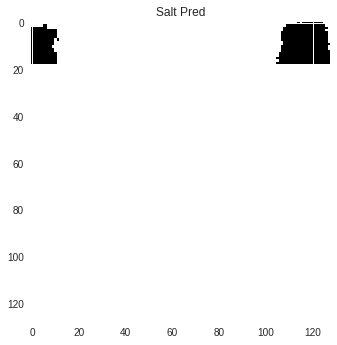

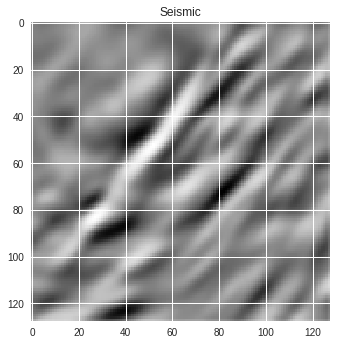

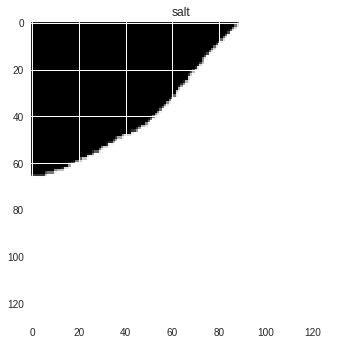

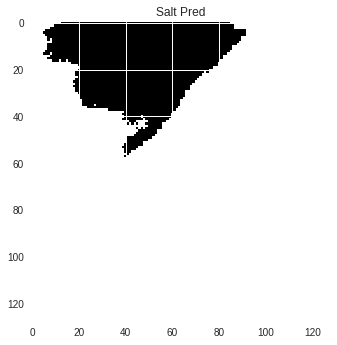

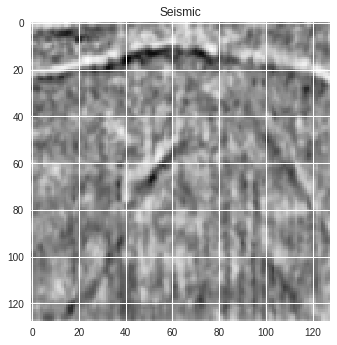

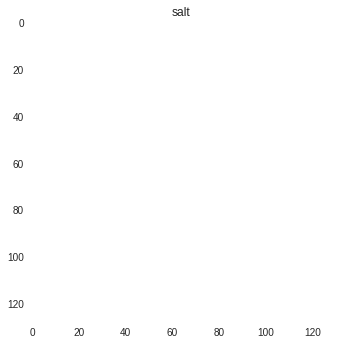

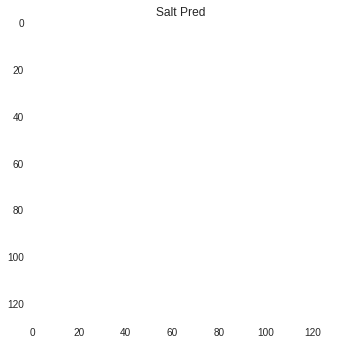

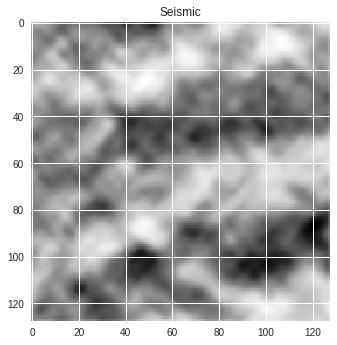

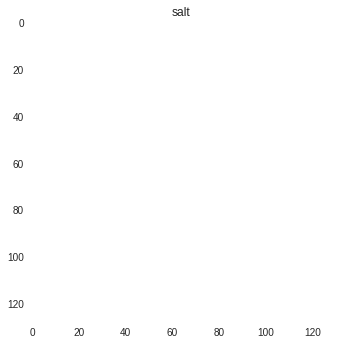

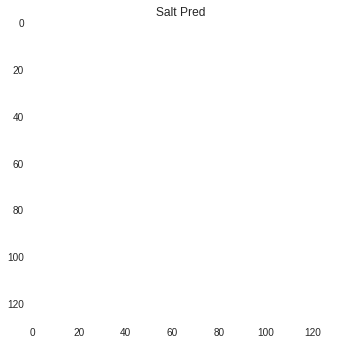

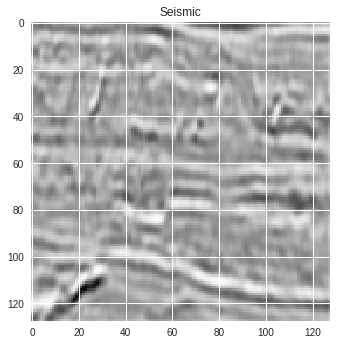

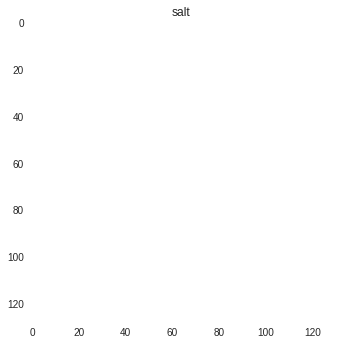

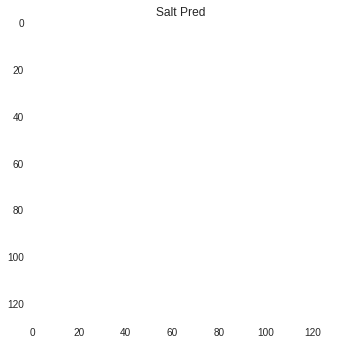

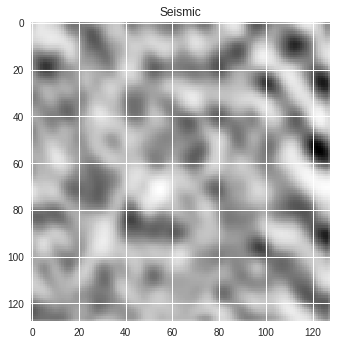

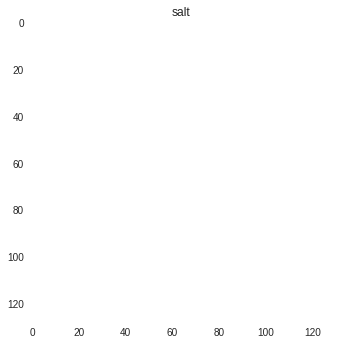

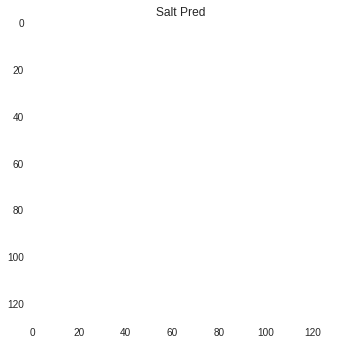

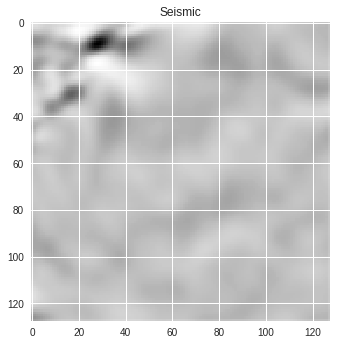

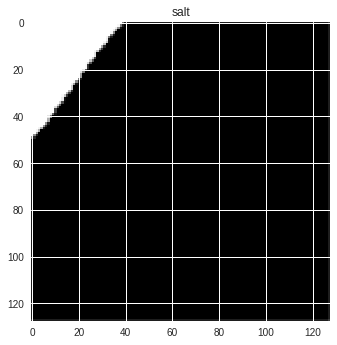

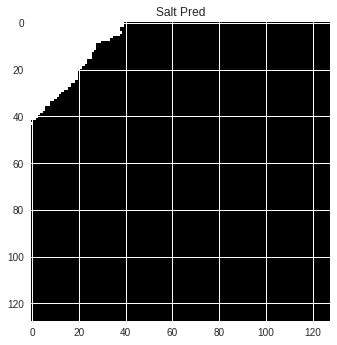

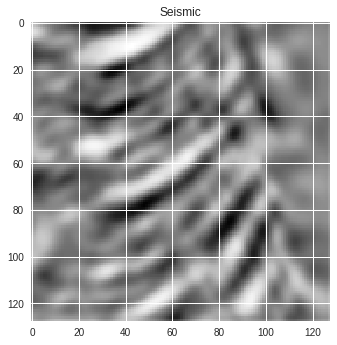

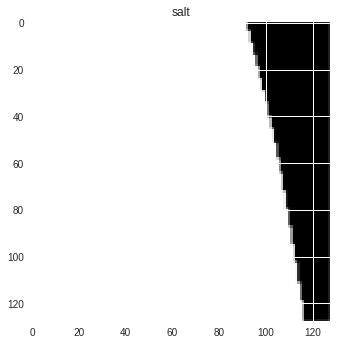

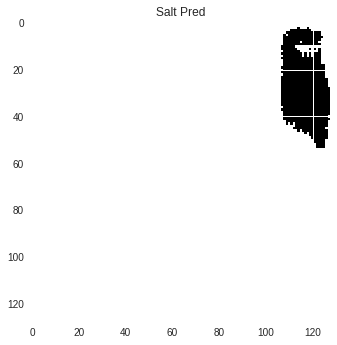

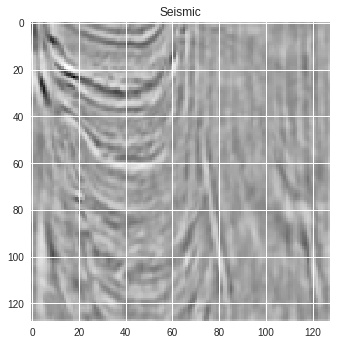

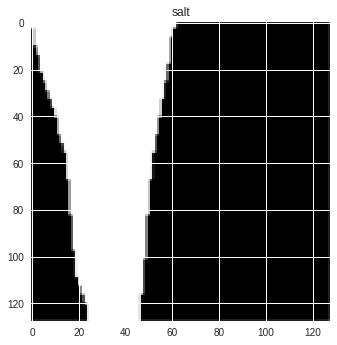

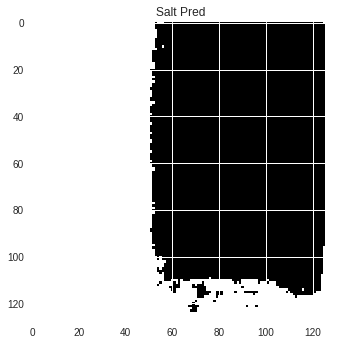

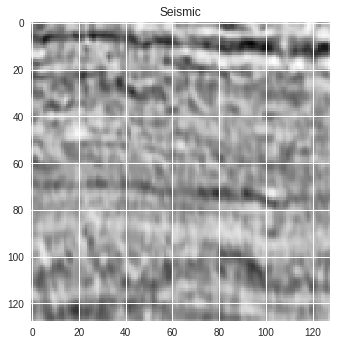

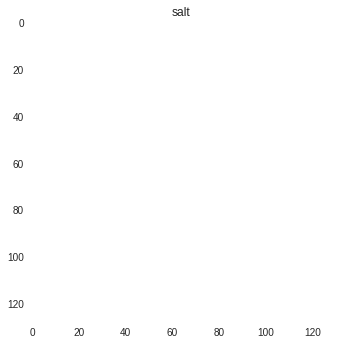

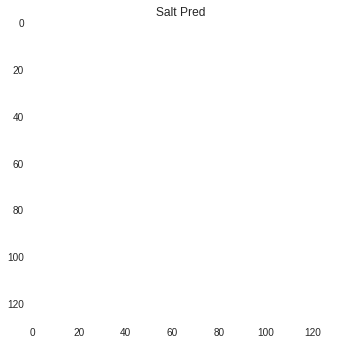

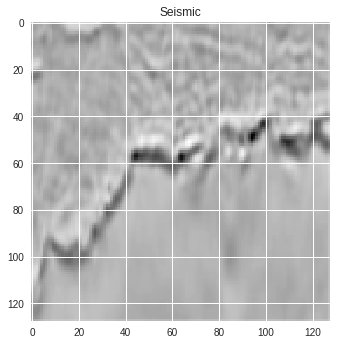

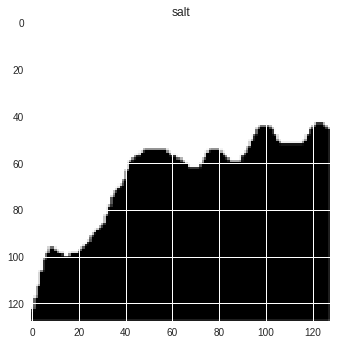

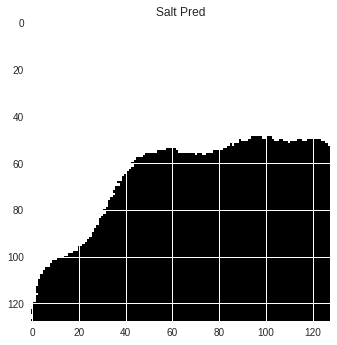

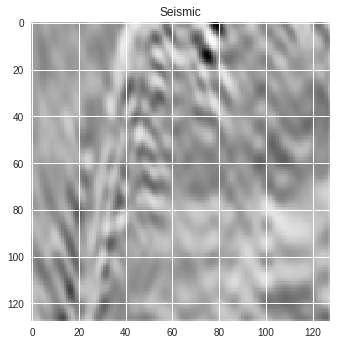

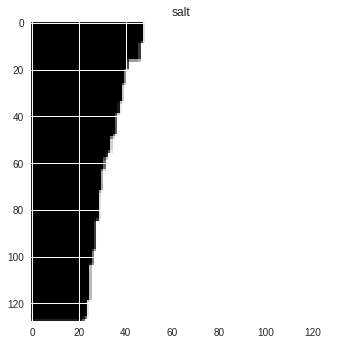

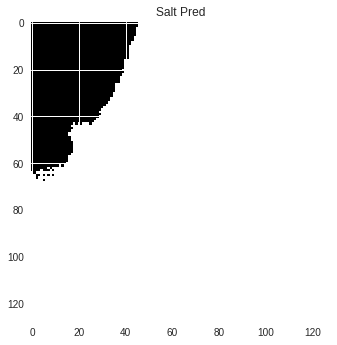

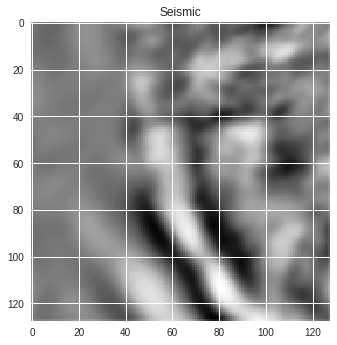

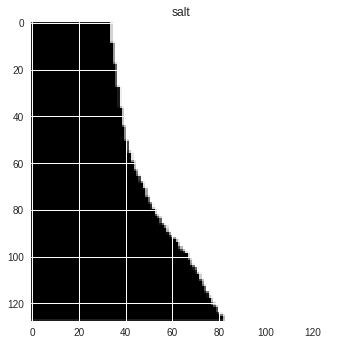

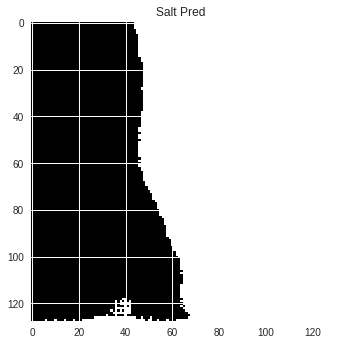

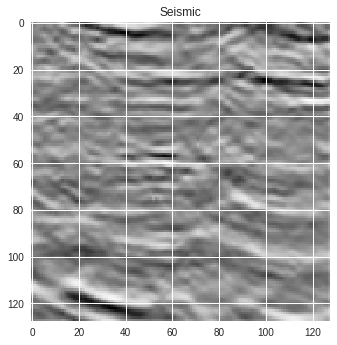

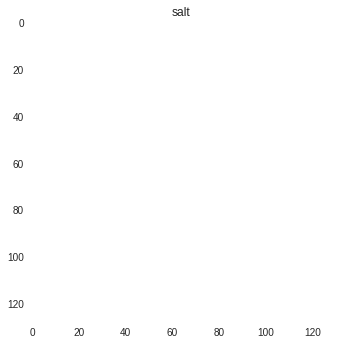

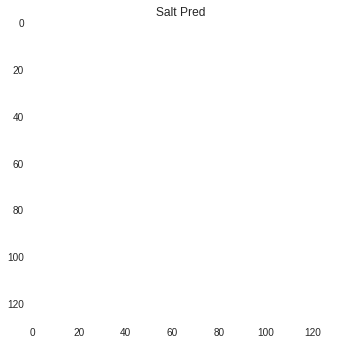

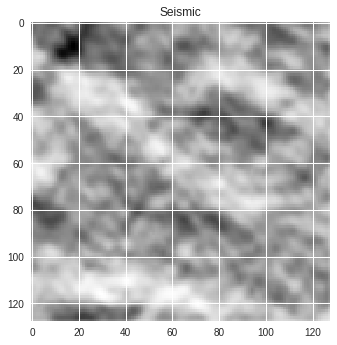

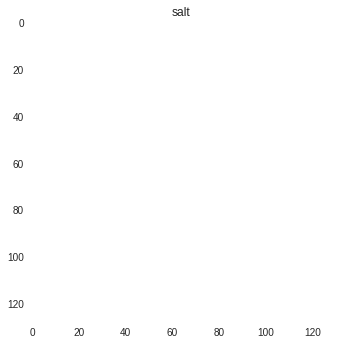

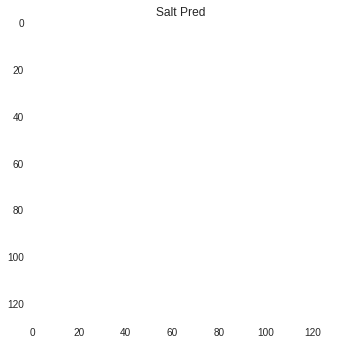

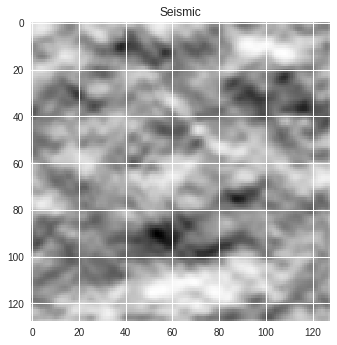

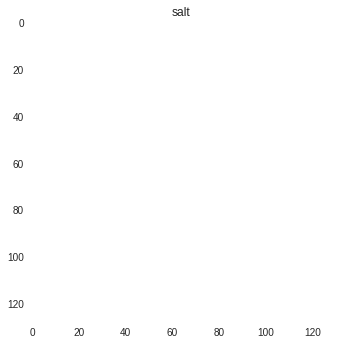

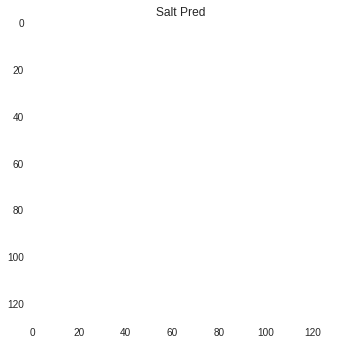

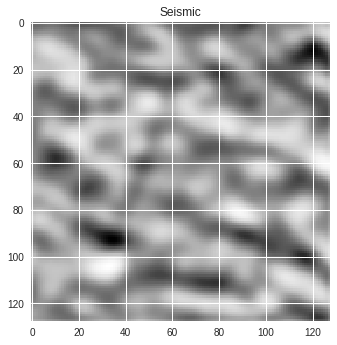

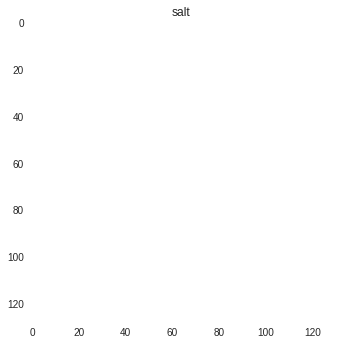

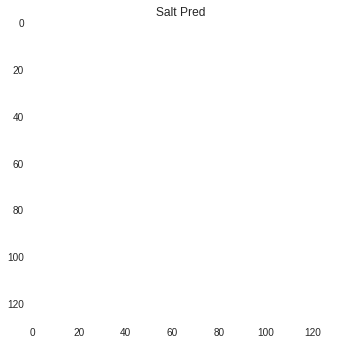

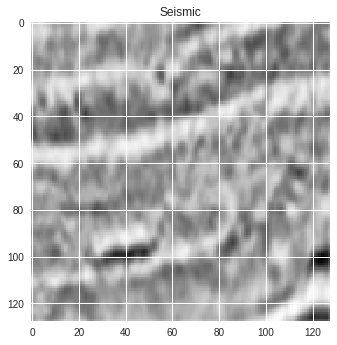

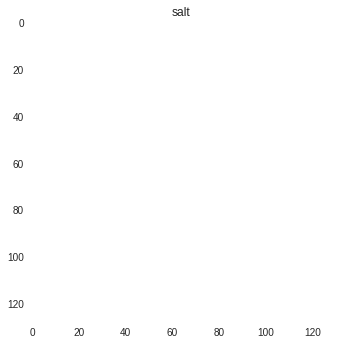

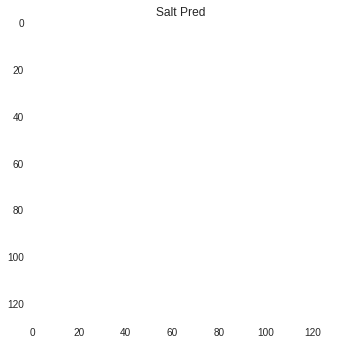

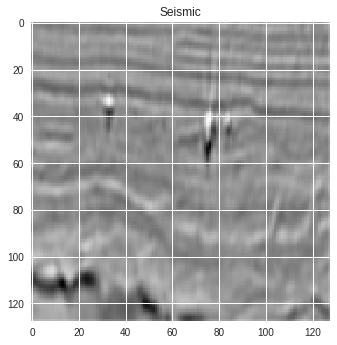

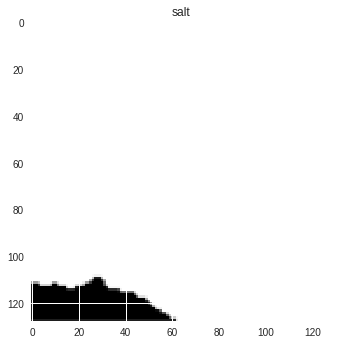

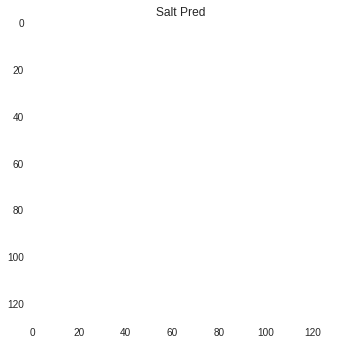

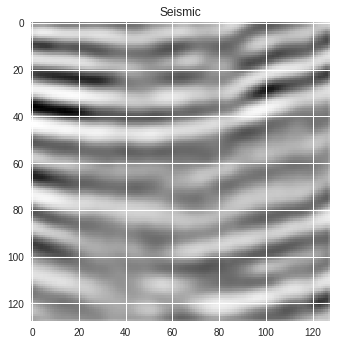

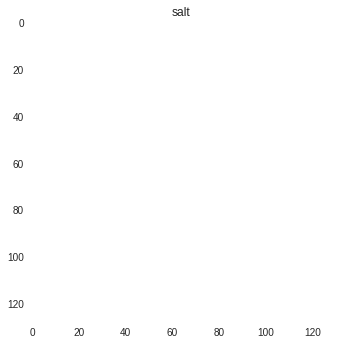

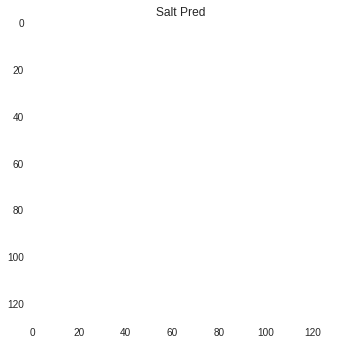

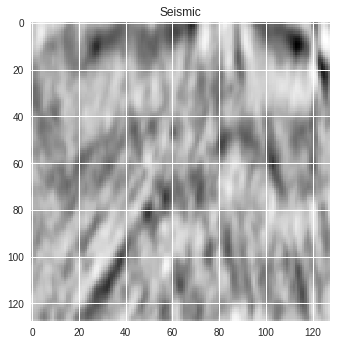

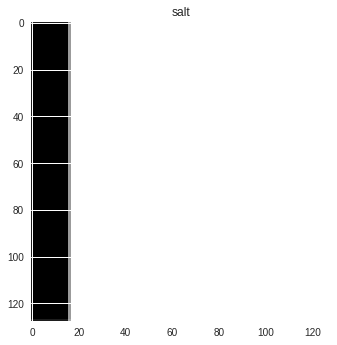

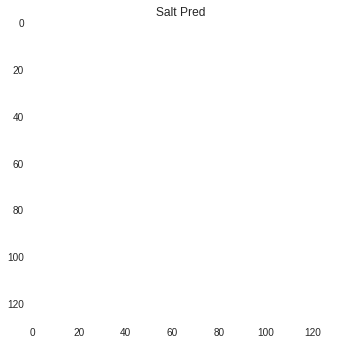

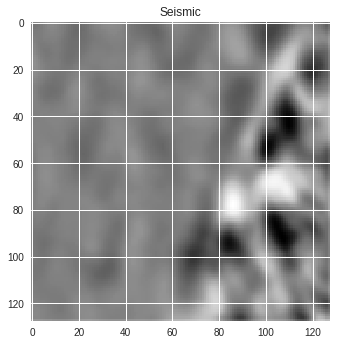

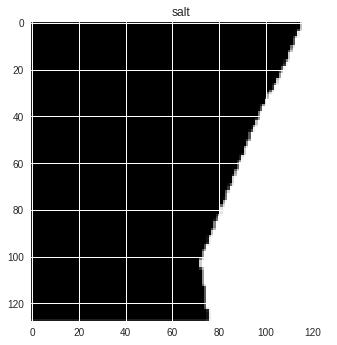

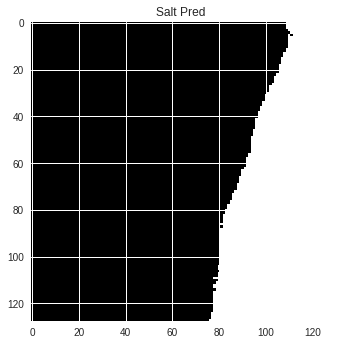

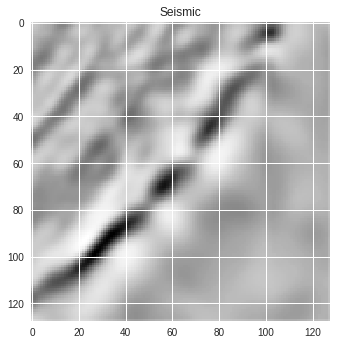

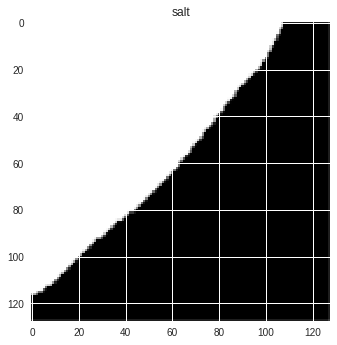

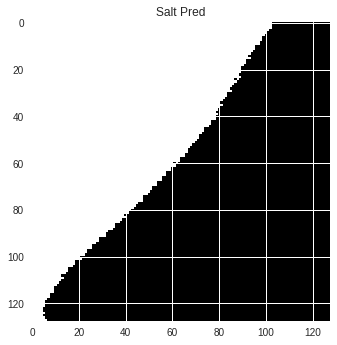

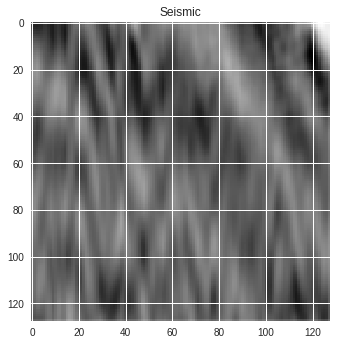

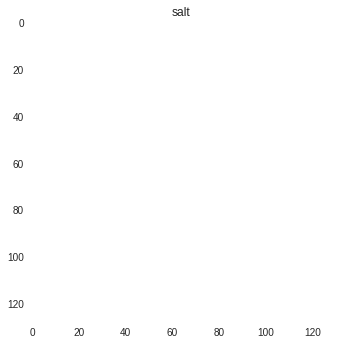

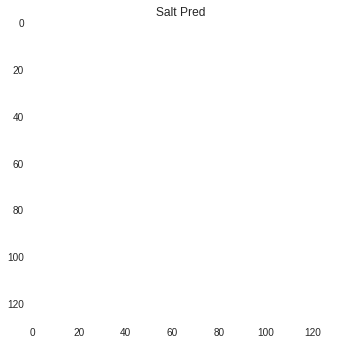

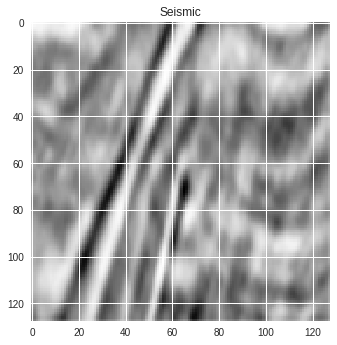

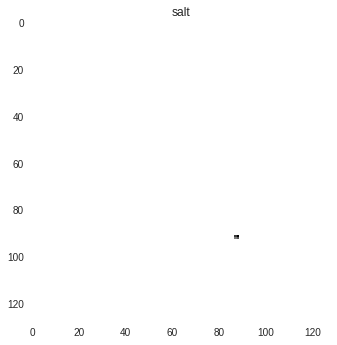

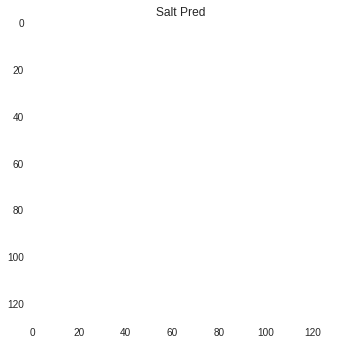

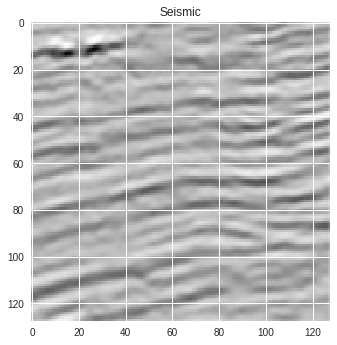

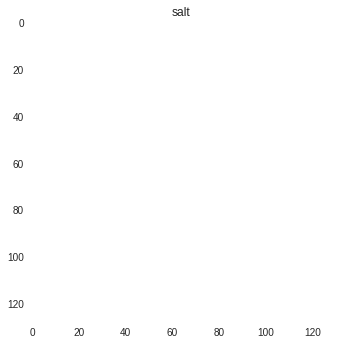

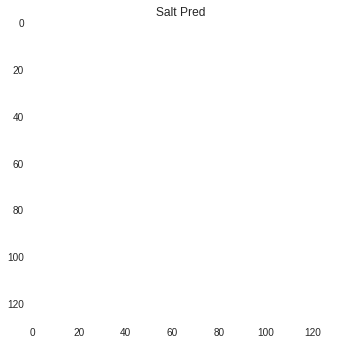

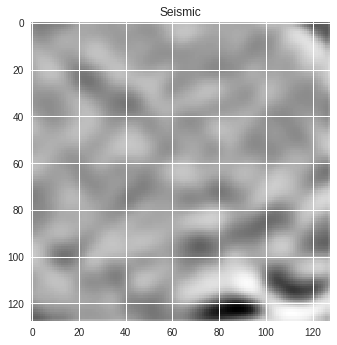

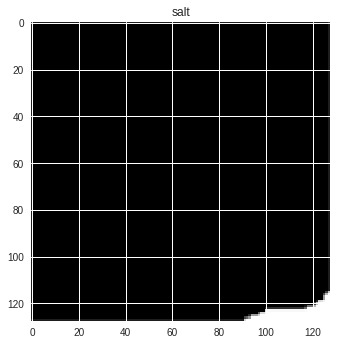

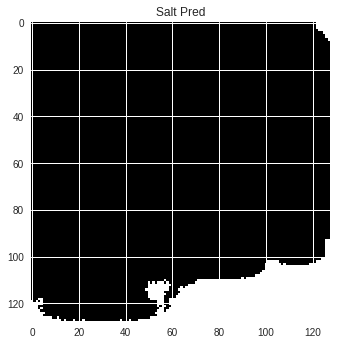

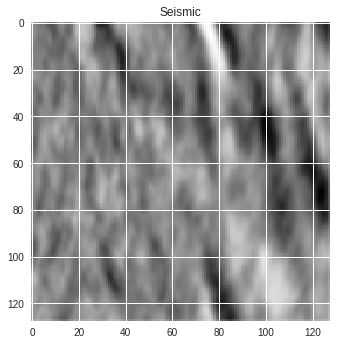

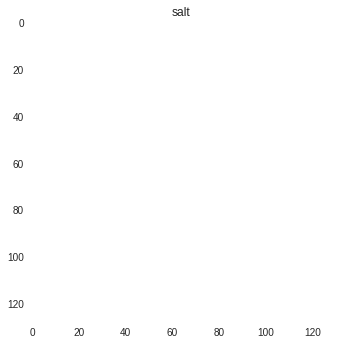

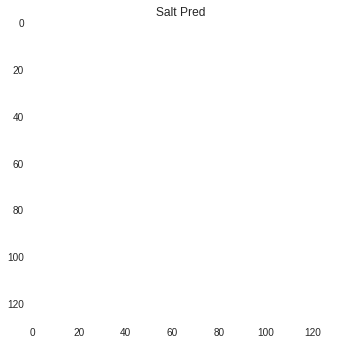

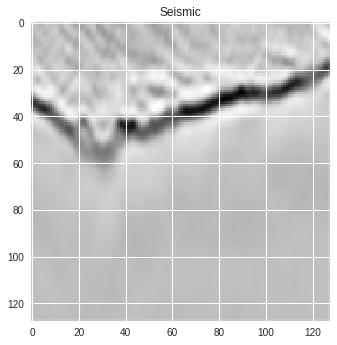

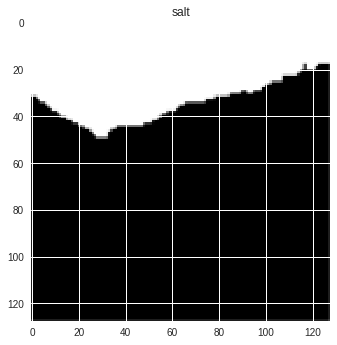

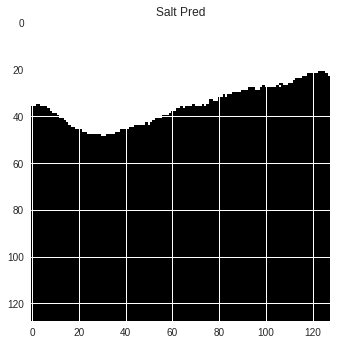

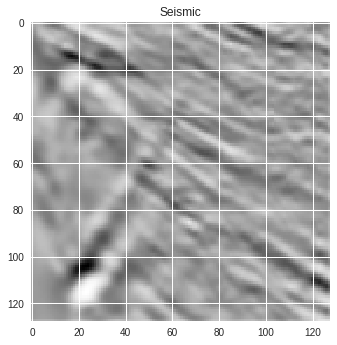

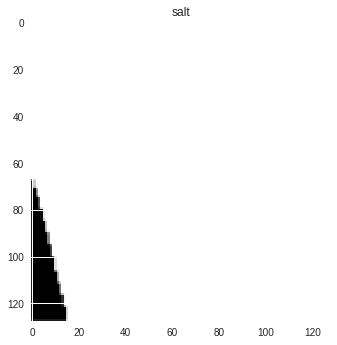

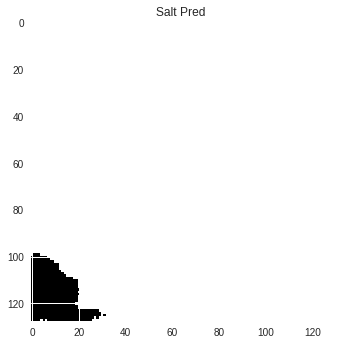

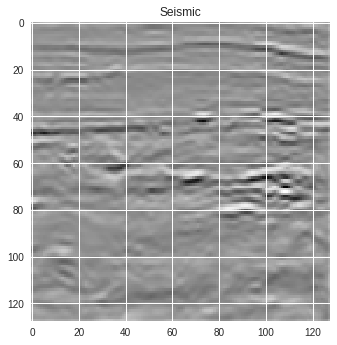

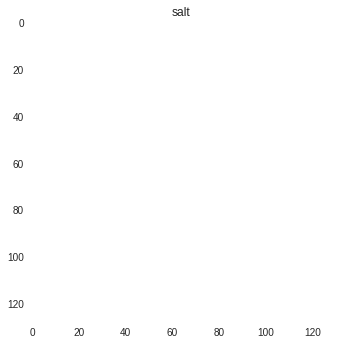

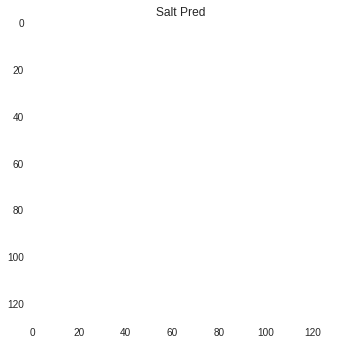

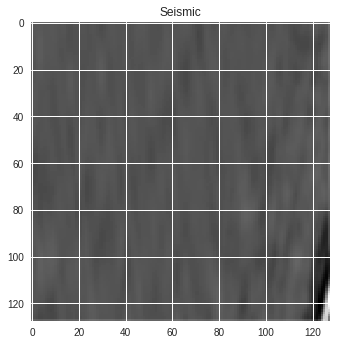

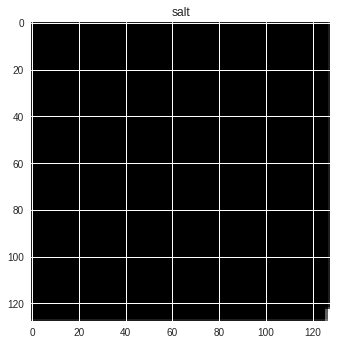

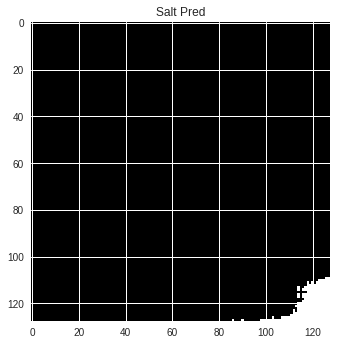

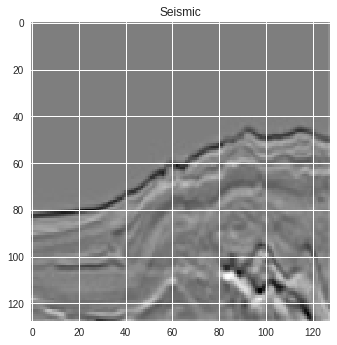

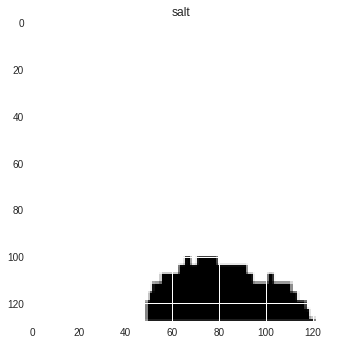

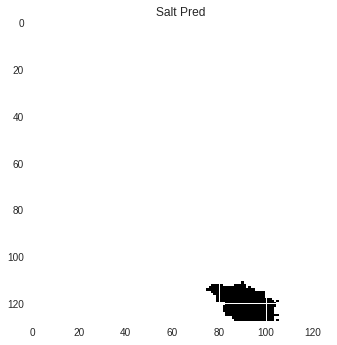

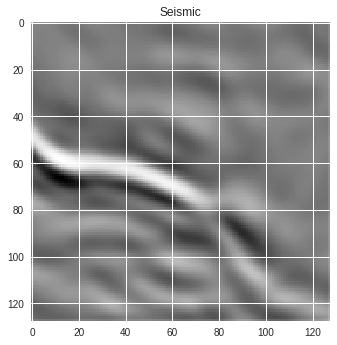

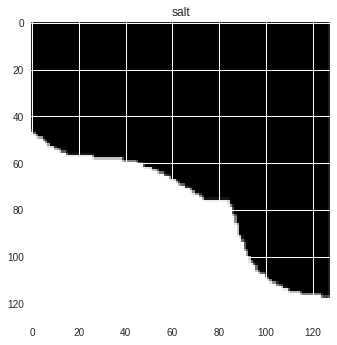

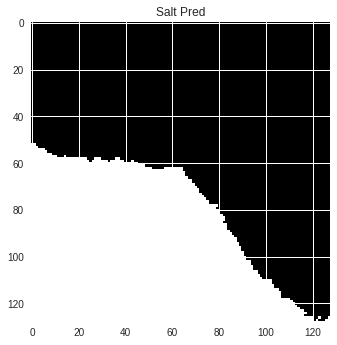

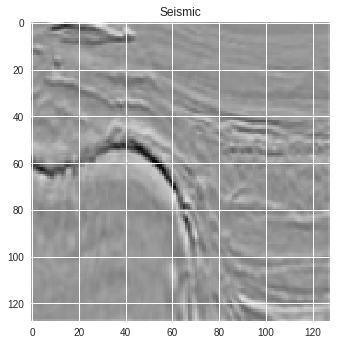

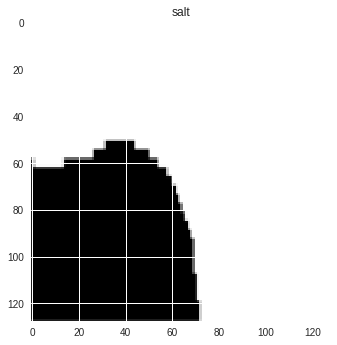

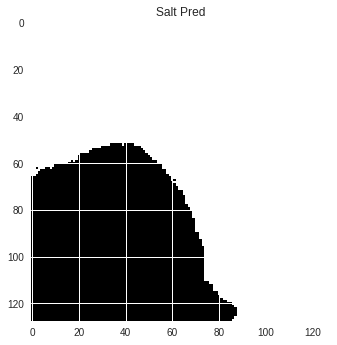

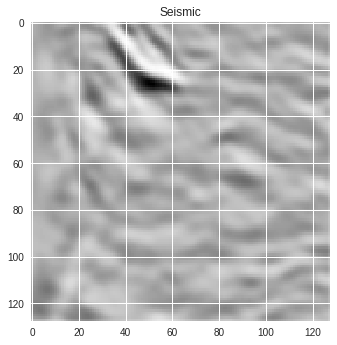

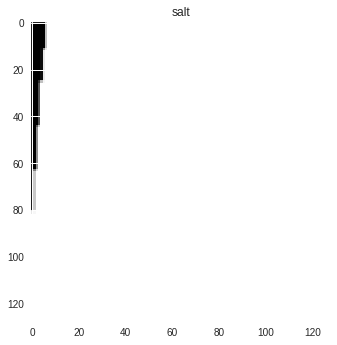

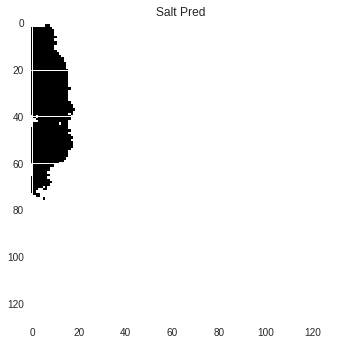

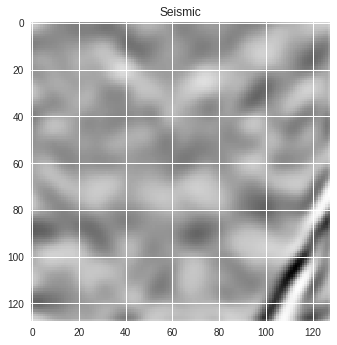

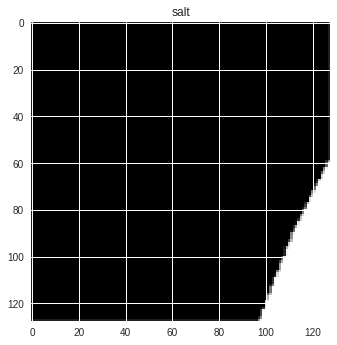

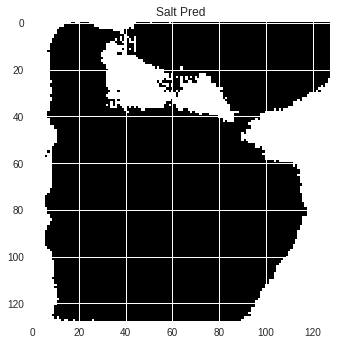

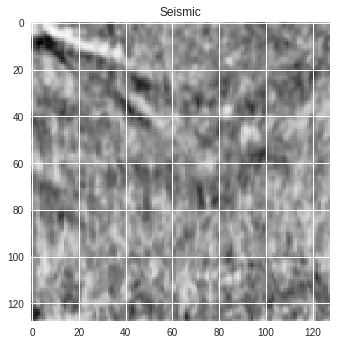

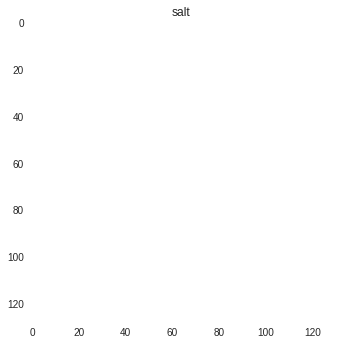

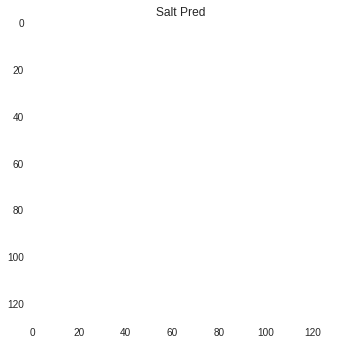

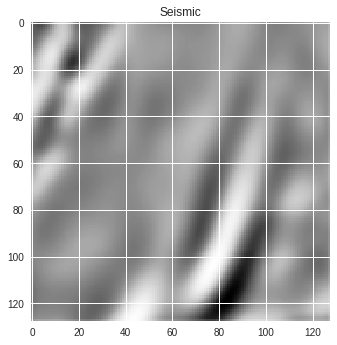

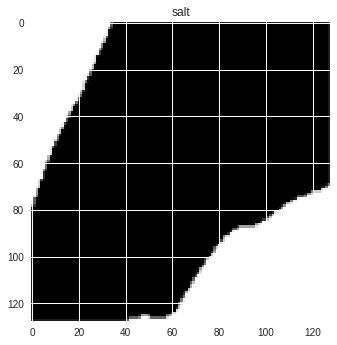

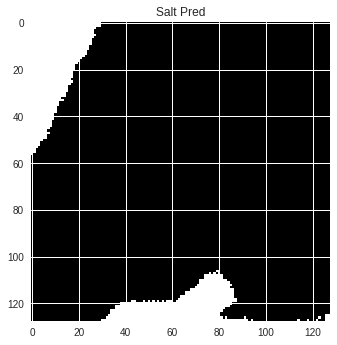

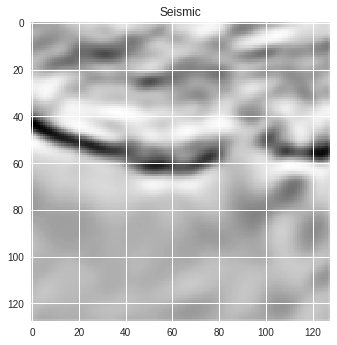

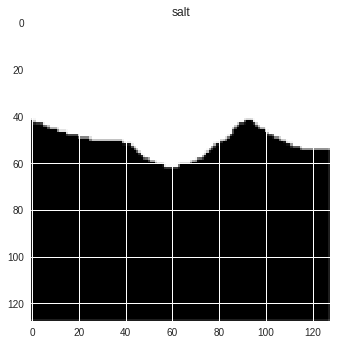

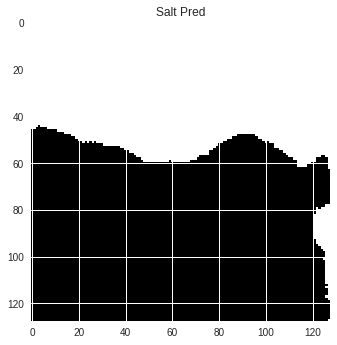

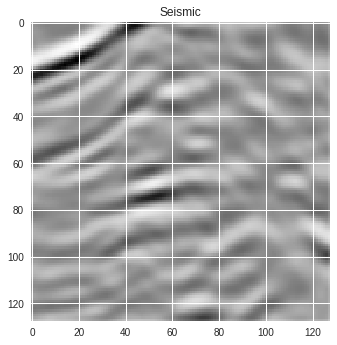

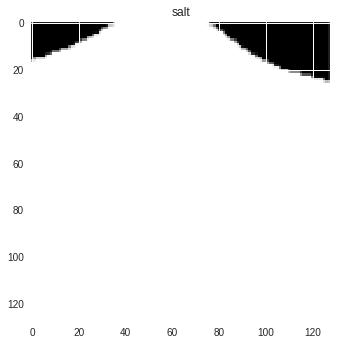

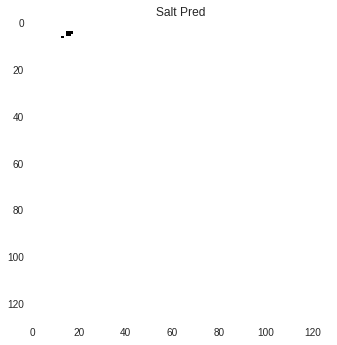

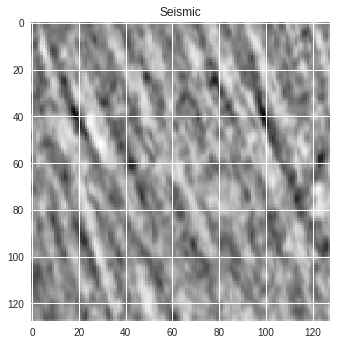

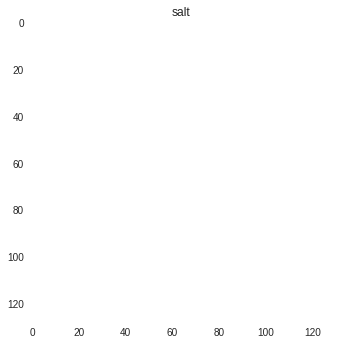

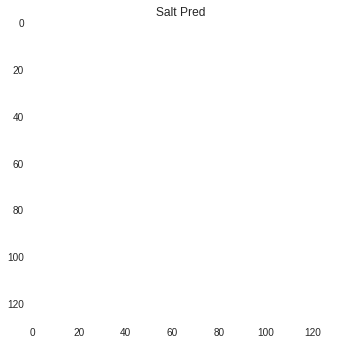

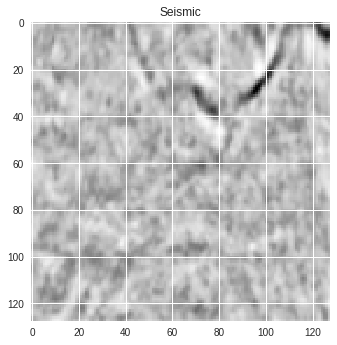

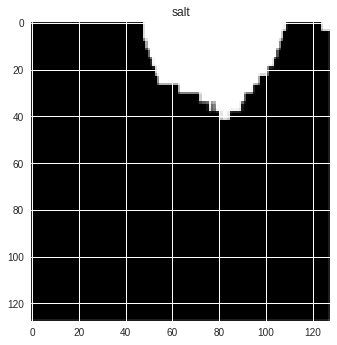

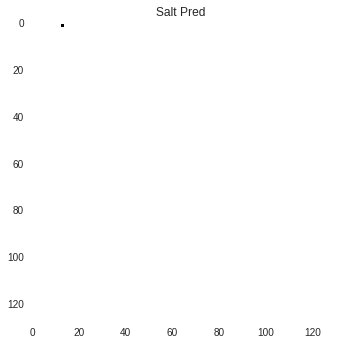

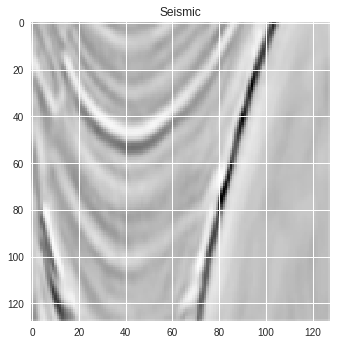

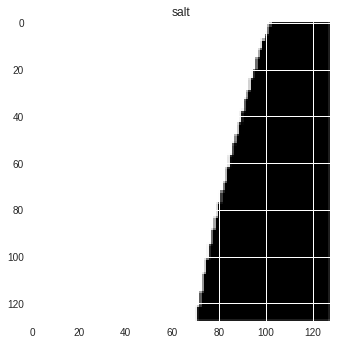

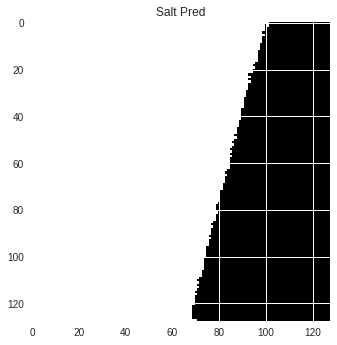

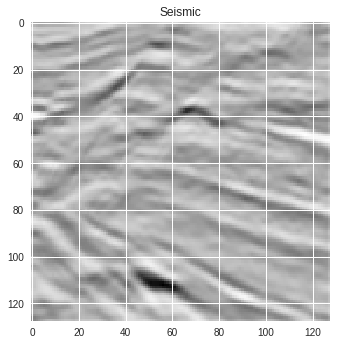

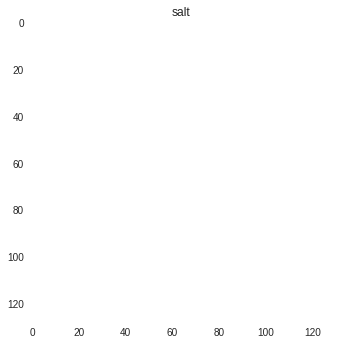

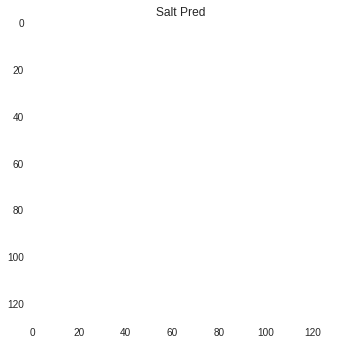

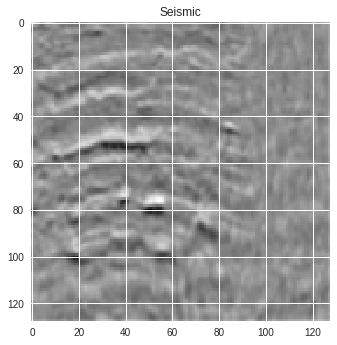

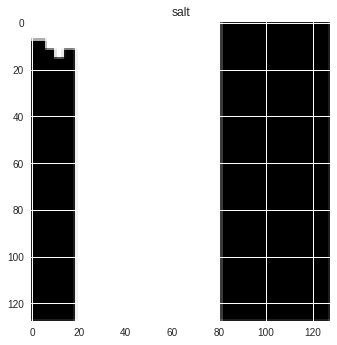

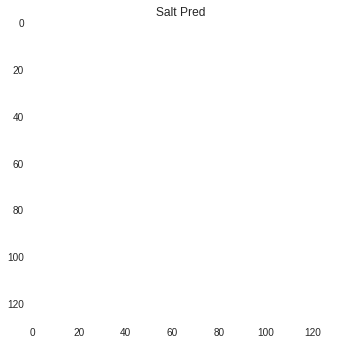

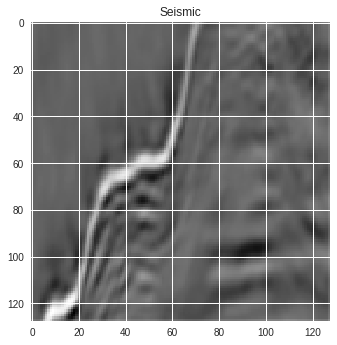

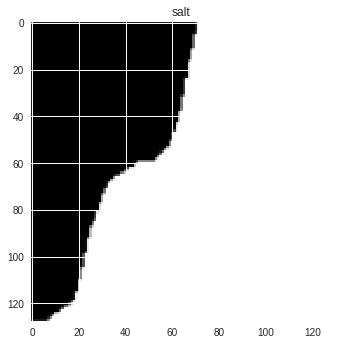

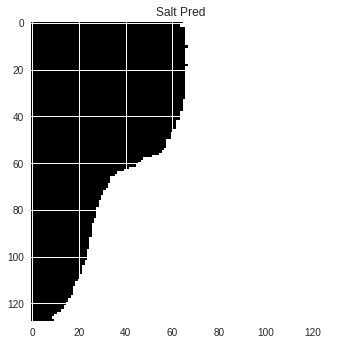

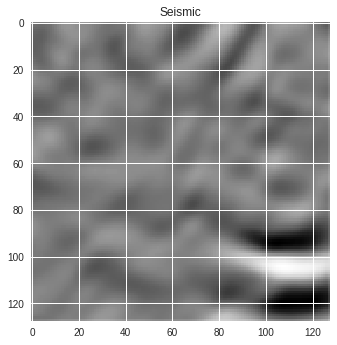

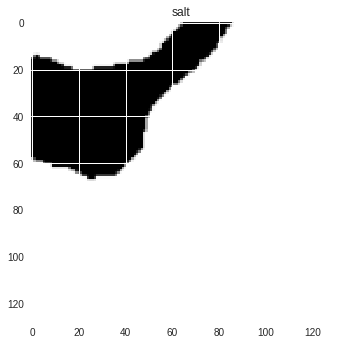

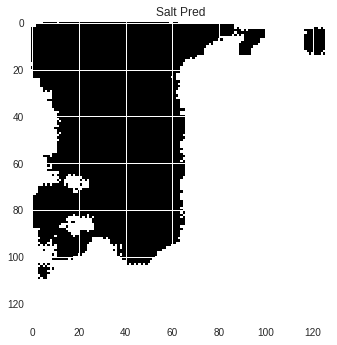

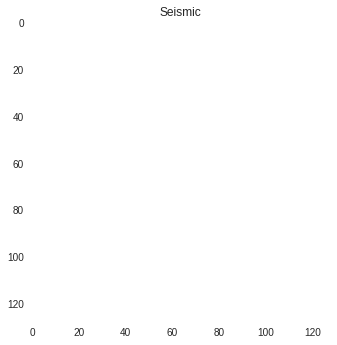

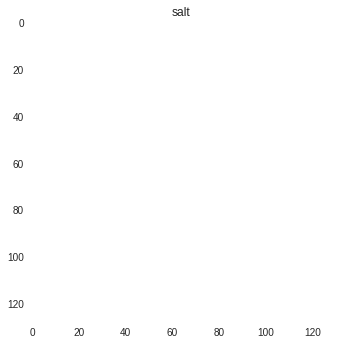

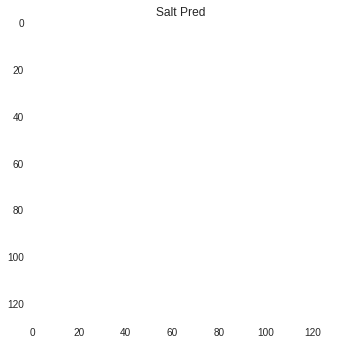

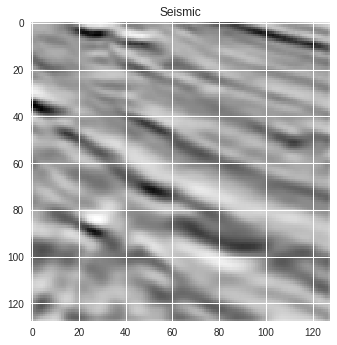

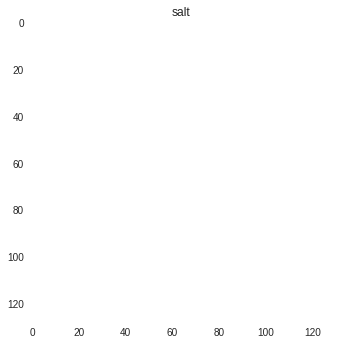

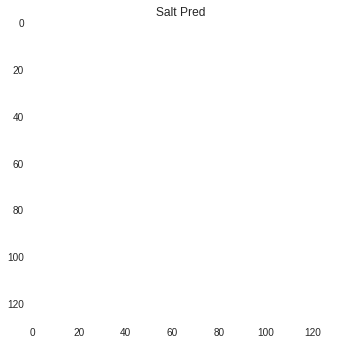

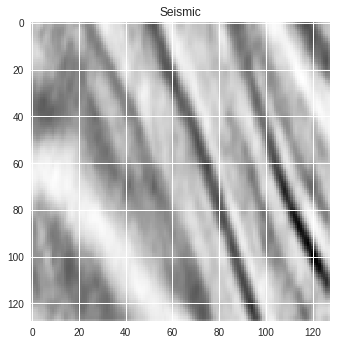

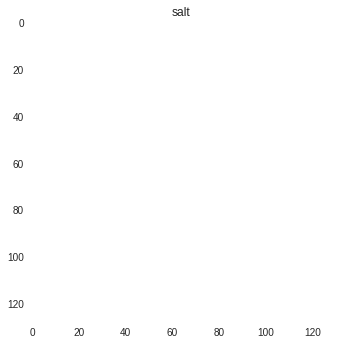

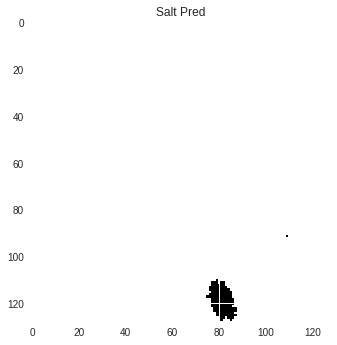

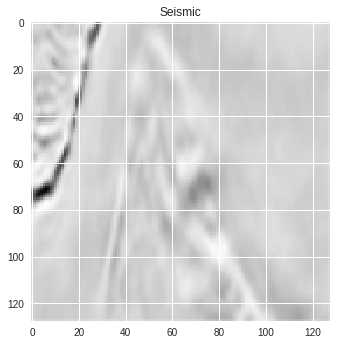

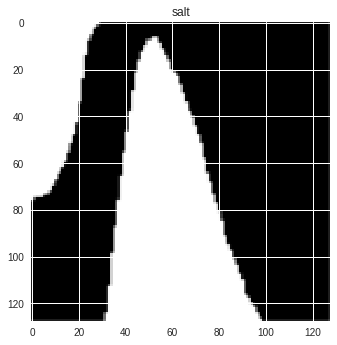

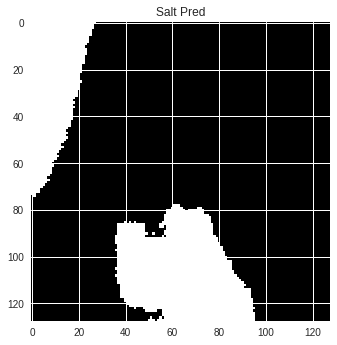

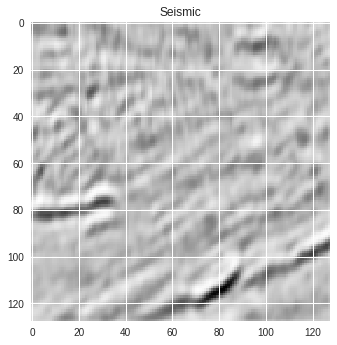

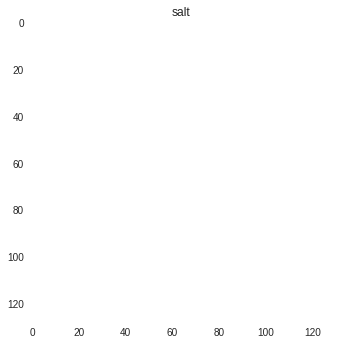

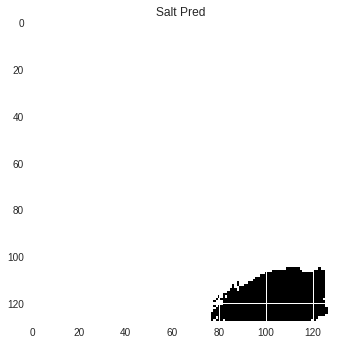

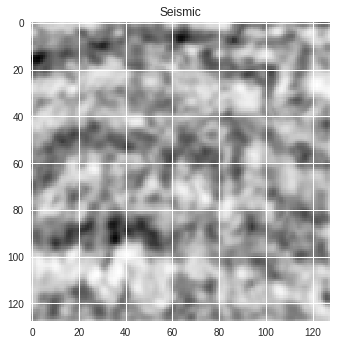

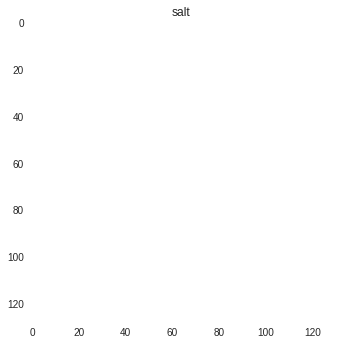

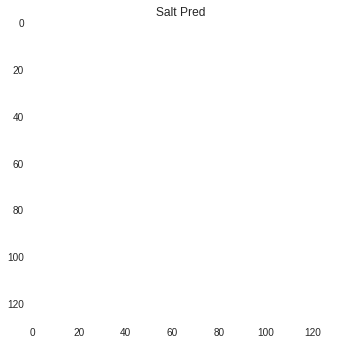

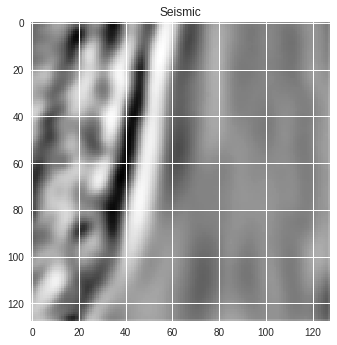

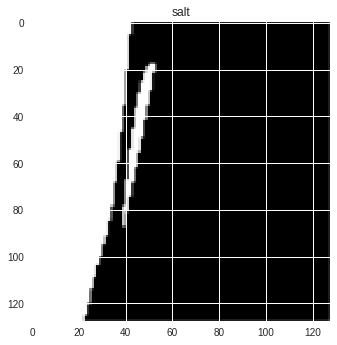

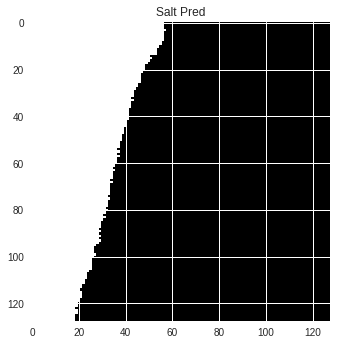

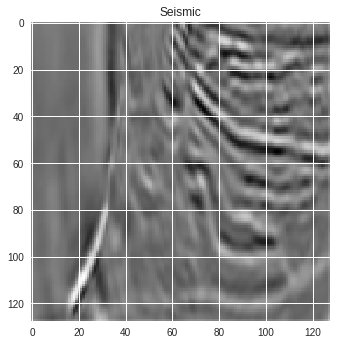

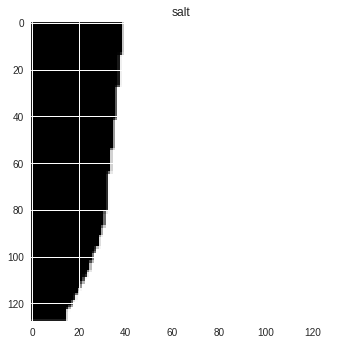

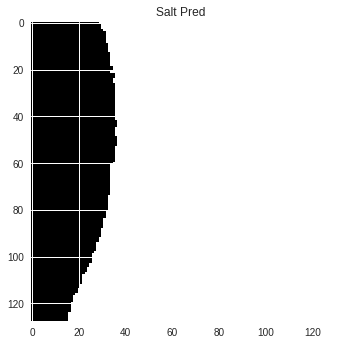

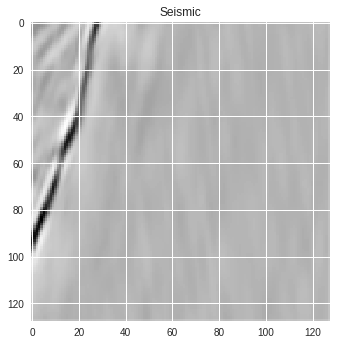

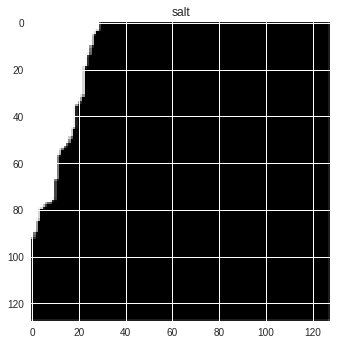

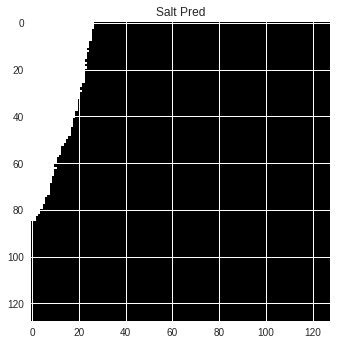

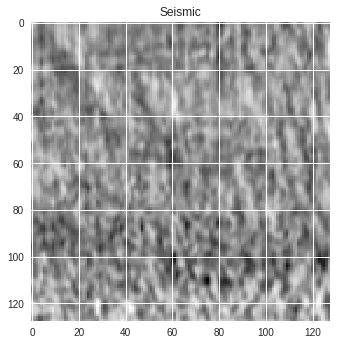

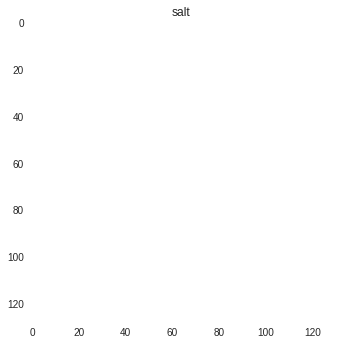

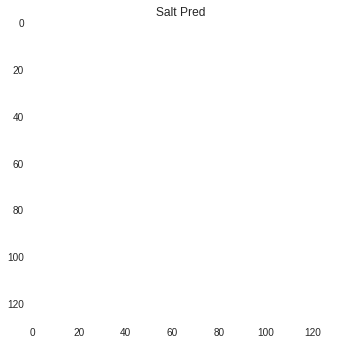

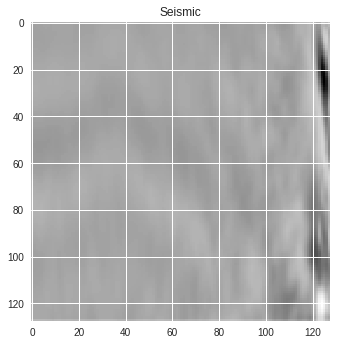

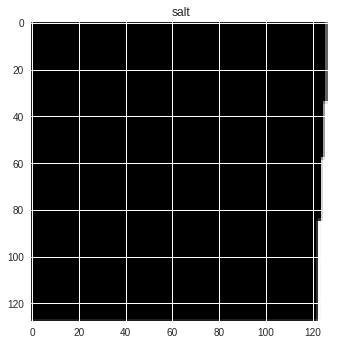

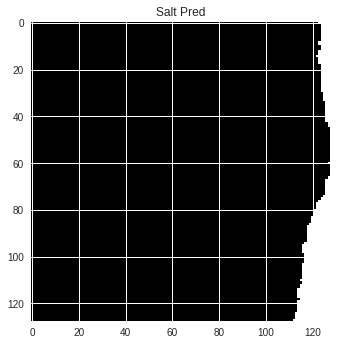

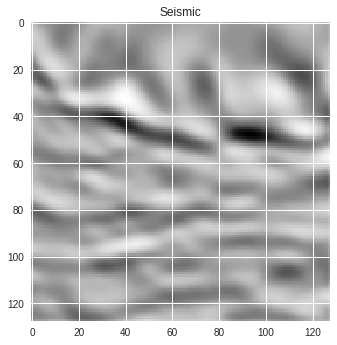

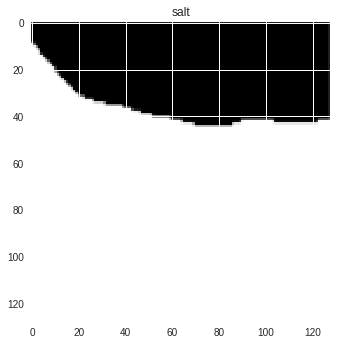

KeyboardInterrupt: ignored

In [12]:
import matplotlib.pyplot as plt
for ix in range(600):
 a=X_valid[ix]
 a=a.squeeze()
 #print(a)
 b=y_valid[ix]
 b=b.squeeze()
 
 c=preds_valid_t[ix]
 c=c.squeeze()
 plt.imshow(a)
 plt.title('Seismic')
 plt.show()
 plt.title('salt')
 plt.imshow(b)
 plt.show()
 plt.title('Salt Pred')

 plt.imshow(c)
 plt.show()

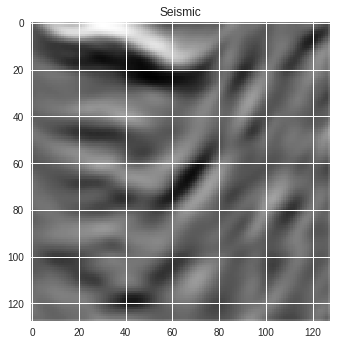

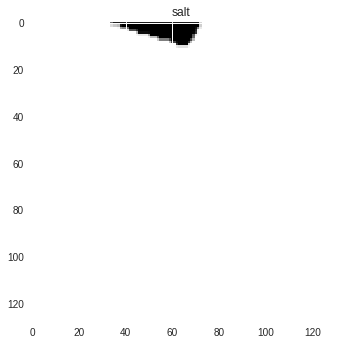

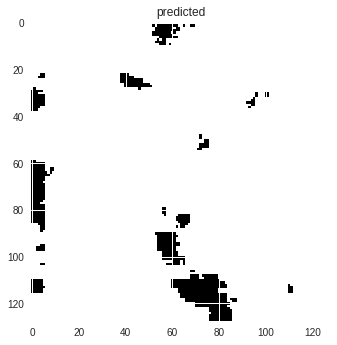

In [15]:
 


import matplotlib.pyplot as plt
ix=6
a=x[ix]
a=a.squeeze()
1#print(a)
b=y[ix]
b=b.squeeze()

c=preds_train_t[ix]
c=c.squeeze()
plt.title('Seismic')
plt.imshow(a)
plt.show()
plt.title('salt')

plt.imshow(b)
plt.show()
plt.title('predicted')

plt.imshow(c)
plt.show()


In [16]:
len(preds_test)
c=preds_train[4]
print(c)

[[[0.70339274]
  [0.73651326]
  [0.7626834 ]
  ...
  [0.67643374]
  [0.6827809 ]
  [0.6421654 ]]

 [[0.6716907 ]
  [0.67295825]
  [0.7896813 ]
  ...
  [0.72319156]
  [0.7491081 ]
  [0.7290841 ]]

 [[0.596076  ]
  [0.5933435 ]
  [0.61865693]
  ...
  [0.8600791 ]
  [0.8508965 ]
  [0.7827923 ]]

 ...

 [[0.47868642]
  [0.39056405]
  [0.190322  ]
  ...
  [0.01753679]
  [0.02475287]
  [0.02166748]]

 [[0.35657954]
  [0.32553643]
  [0.24883644]
  ...
  [0.00584698]
  [0.02541607]
  [0.03226531]]

 [[0.40942225]
  [0.3908496 ]
  [0.24233995]
  ...
  [0.01189063]
  [0.0283806 ]
  [0.05802329]]]


In [0]:
def RLenc(img, order='F', format=True):
    """
    img is binary mask image, shape (r,c)
    order is down-then-right, i.e. Fortran
    format determines if the order needs to be preformatted (according to submission rules) or not

    returns run length as an array or string (if format is True)
    """
    bytes = img.reshape(img.shape[0] * img.shape[1], order=order)
    runs = []  ## list of run lengths
    r = 0  ## the current run length
    pos = 1  ## count starts from 1 per WK
    for c in bytes:
        if (c == 0):
            if r != 0:
                runs.append((pos, r))
                pos += r
                r = 0
            pos += 1
        else:
            r += 1

    # if last run is unsaved (i.e. data ends with 1)
    if r != 0:
        runs.append((pos, r))
        pos += r
        r = 0

    if format:
        z = ''

        for rr in runs:
            z += '{} {} '.format(rr[0], rr[1])
        return z[:-1]
    else:
        return runs

pred_dict = {fn[:-4]:RLenc(np.round(preds_test_upsampled[i])) for i,fn in enumerate(test_ids)}

In [0]:
sub = pd.DataFrame.from_dict(pred_dict,orient='index')
sub.index.names = ['id']
sub.columns = ['rle_mask']
sub.to_csv('submission.csv')

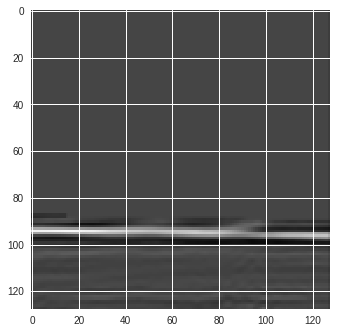

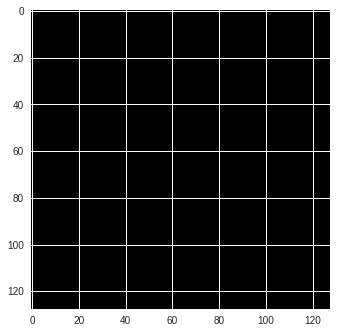

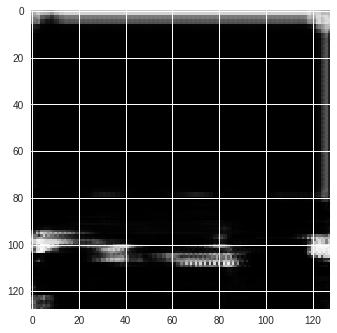

4


In [19]:
import matplotlib.pyplot as plt
# Perform a sanity check on some random training samples
#ix = np.random.randint(0, len(train_ids))
ix=4
plt.imshow(np.dstack((x[ix],x[ix],x[ix])))
plt.show()
tmp = np.squeeze(y[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()
tmp = np.squeeze(preds_train[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()
print(ix)

In [20]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /root/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /root/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 6.7 GB  | Proc size: 7.1 GB
GPU RAM Free: 10302MB | Used: 1139MB | Util  10% | Total 11441MB



import keras.backend as K
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)
#model = get_unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
 #model.summary()
 
```from PIL import Image
#import matplotlib.pyplot as plt
#a = plt.subplots(1,2)

Image.open("./images/8d08955cdf.png")
#a[1]=Image.open("./masks/8d08955cdf.png")
inputdata = keras.preprocessing.image.ImageDataGenerator(      )
#x_train = np.random.random((10,1000,20,3))
#inputdata = keras.preprocessing.image.ImageDataGenerator(      )
x_train=inputdata.flow_from_directory('./images',target_size=(96,96),batch_size=5)
y_train=inputdata.flow_from_directory('./masks',target_size=(96,96),batch_size=5)
train_generator = zip(x_train,y_train)
#results = model.fit(x_train, y_train, validation_split=0.1, batch_size=8, epochs=30)
results=model.fit_generator(train_generator, steps_per_epoch=400, epochs =30)
# This is formatted as code
```



# New Section